Haz clic en el botón para abrir este notebook en Google Colab:

<a href="https://colab.research.google.com/github/EuniceGarcia503/Challenge1_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" style="height: 40px;">
</a>


#**💾 Bases de Datos.**



---
![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/imagen_AluraStore_bases_datos.png)

---
---

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


--------------------------------------------------------------------------------

#**🧾 Descripción de los Datos.**

-------------------------------------------------------------------------

El conjunto de datos incluye la siguientes columnas y su respectiva información:

- **Producto,Categoría del Producto:** Artículos vendidos y clasificación del artículo. Ambos datos tipo object.

- **Precio y Costo de Envío:** Valores de venta y costos asociados a su distribución. Ambos datos tipo float64.

- **Fecha de Compra y Lugar de Compra:** Información temporal y geográfica de la compra. Datos para fecha datetime64[ns] y Lugar tipo object respectivamente.

- **Calificación:** Evaluación de compra sugiere una nota general del clientes. Sin comentarios adicionales. Dato tipo int64.

- **Método de Pago:** Métodos utilizados por los clientes, tipo de pago y cuotas. Dato tipo object.

- **lat y lon:** Coordenadas Geográficas en longitud y latitud que sugieren ubicación de las transacciones.Ambos datos tipo float64

-----------------------------------------------------------------------------------

#**⚙️ Listas Útiles para el Análisis.**

In [3]:
#base_tienda contiene los variables con los datos por tienda.
base_tienda = [tienda1,tienda2,tienda3,tienda4]
#nombre_tienda contiene los nombres de las tiendas.
nombre_tienda = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
#emojis_ranking_categorias contiene los emojis para rankings de categorías (hasta 8 categorías)
emojis_ranking_categorias = ['1️⃣', '2️⃣', '3️⃣', '4️⃣', '5️⃣', '6️⃣', '7️⃣', '8️⃣']
#Lista Emojis emojis_ranking_productos para top productos más vendidos.
emojis_ranking_productos = ['1️⃣', '2️⃣', '3️⃣']
#Lista Emojis emojis_ranking_productos_descendente para top productos menos vendidos.
emojis_ranking_productos_descendente = ['3️⃣', '2️⃣', '1️⃣']
#Listas emoji_notas para medir satisfacción de cliente.
emoji_notas = ["🔵 Excelente.","🟢 Buena.","🟡 Aceptable.","🔴 Revisión."]
#Lista periodos_años contiene los años de los registros en cada base. (como enteros para facilitar comparaciones)
periodos_años = [2020, 2021, 2022, 2023]
#Lista periodos_trimestres contiene etiqueta del trimestres del año.
periodos_trimestres = ['T1', 'T2', 'T3', 'T4']
# Años observados (como enteros para facilitar comparaciones)
periodos_años = [2020, 2021, 2022, 2023]
# Años observados str (como enteros para facilitar comparaciones)
años_str = ['2020', '2021','2022','2023']

In [4]:
#Tratamiento de columna fechas para análisis temporales.
#Dar formato datetime a columna Fecha de Compra.
#Definimos función datetime_format convierte dato datetime.
def datetime_format(df):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'],format='%d/%m/%Y',dayfirst=True,errors='coerce',)
  return df
#Declarar función datetime_format en todas las bases.
for i in base_tienda:
  datetime_format(i)

#Agregar columna Año,Mes y Trimestre.
#Definimos función: año_mes_trimestre para agregar columna Año,Mes y Trimestre en cada base de tienda.
def año_mes_trimestre (df):
  df['Año'] = df['Fecha de Compra'].dt.year#Agregar columna de año.
  # Agregar columna de mes, handling potential NaN values
  df['Mes'] = df['Fecha de Compra'].dt.month
  df['Mes'] = pd.to_numeric(df['Mes'], errors='coerce').astype('Int64')#Reforzamos que es un valor númerico de tipo entero para aplicar función más adelante.
  df['Trimestre'] = df['Fecha de Compra'].dt.quarter#Agregar columna de trimestre.
  df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
  return df

#Declarar función año_mes_trimestre en todas las bases.
for df in base_tienda:
  año_mes_trimestre(df)


#🧲 **Importando Otras Bibliotecas para el Análisis.**

In [5]:
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt  # Librería para gráficos básicos
import matplotlib.cm as cm # módulo de colormaps (mapas de colores) de matplotlib.
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import folium
##Para utilizar imagen de repositorio.
import urllib.request
from PIL import Image

---
#🧮 **Cálculos.**

---

![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/imagen_calculo_AluraStore.png)

---

##**📌  Cálculos Solicitados y Complementarios.**

-----------------------------------------------------------------------


###**🖱️ Ventas Totales por Tienda.**


-----------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Determinar cuál tienda ha generado la mayor cantidad de ingresos totales. Este cálculo entrega un primer acercamiento al rendimiento general de cada tienda, reflejando cuánto dinero ha captado a través de sus ventas.

**🧠 Interpretación esperada:**

* Las ventas totales indican la capacidad de una tienda para generar ingresos brutos.

* Una tienda con un volumen alto de ventas, sugiere mayores ingresos,  precios adecuados o alta demanda.

* Una tienda con ingresos bajos podría estar enfrentando problemas en su operación, que abria de investigar.

* Aunque no es una métrica definitiva por sí sola, un ingreso total bajo puede ser una señal de alerta sobre su viabilidad.

In [6]:
#Código cálculo de ventas totales por tienda.
#vt_portienda contiene las ventas totales por tienda.
vt_portienda = {}

#Función ventas_totales suma y totabiliza las ventas de cada tienda.
def ventas_totales(base,tienda):
  global vt_portienda
  vt = base['Precio'].sum()
  vt_portienda[tienda] = vt
  return vt_portienda

#Declaramos función ventas_totales para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  ventas_totales(base,tienda)

#Importamos las llaves y valores del diccionario vt_portienda para crear DataFrame.
key_vt_portienda = list(vt_portienda.keys())
val_vt_portienda = list(vt_portienda.values())

#Creamos DataFrame df_vt_portienda con valor de columna Tienda y Ventas Totales.
df_vt_portienda = pd.DataFrame({'Tienda':key_vt_portienda,'Ventas_Totales':val_vt_portienda}).sort_values(by='Ventas_Totales',ascending=False)

#Visualización Resumen Ventas Totales por Tienda (datos del diccionario vt_portienda)
print(f'💰 Ventas Totales por Tienda:\n')
for tienda,ventas in vt_portienda.items():
  print(f'🏪 {tienda}:  $ {ventas:>10,.2f} CLP')

#Cálculos complementarios para análisis preliminar de las ventas por tienda.
venta_global = df_vt_portienda['Ventas_Totales'].sum()
diferencia_tienda1_tienda4 = df_vt_portienda['Ventas_Totales'][0] - df_vt_portienda['Ventas_Totales'][3]
porcentaje_diferencia_t1_t4 = (diferencia_tienda1_tienda4 / venta_global) * 100

print(f"\nComentarios preliminares.\n")
print(f"* Las Ventas Globales ascienden a $ {venta_global:,.2f} COP.")
print(f"* La Diferencia en ventas entre T1 y T4 es $ {diferencia_tienda1_tienda4:,.2f} COP y representa el {porcentaje_diferencia_t1_t4:,.2f} % de las ventas globales.")

print()

💰 Ventas Totales por Tienda:

🏪 Tienda 1:  $ 1,150,880,400.00 CLP
🏪 Tienda 2:  $ 1,116,343,500.00 CLP
🏪 Tienda 3:  $ 1,098,019,600.00 CLP
🏪 Tienda 4:  $ 1,038,375,700.00 CLP

Comentarios preliminares.

* Las Ventas Globales ascienden a $ 4,403,619,200.00 COP.
* La Diferencia en ventas entre T1 y T4 es $ 112,504,700.00 COP y representa el 2.55 % de las ventas globales.



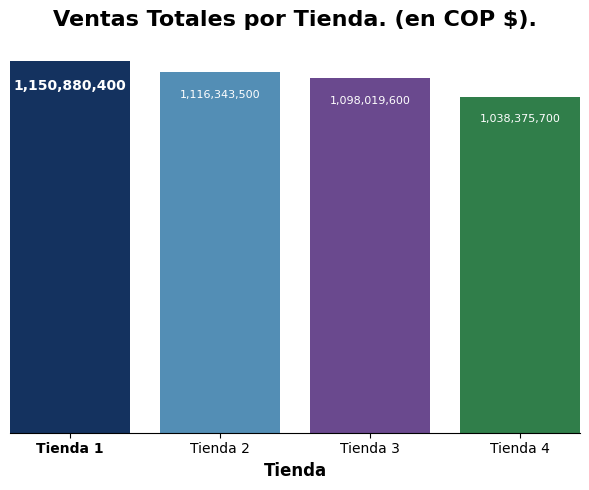

In [7]:
#Gráfico de barra vertical para las ventas totales por tienda.
#Calcular facturación total por tienda
facturacion_tienda = df_vt_portienda.copy()

# Identificar tienda de mayor facturación
tienda_max = df_vt_portienda.loc[facturacion_tienda['Ventas_Totales'].idxmax(), 'Tienda']

# Diccionario de colores (ya debes tenerlo)
# Colores para identificar c/tienda en los gráficos.
colores_tiendas = {
        'Tienda 1': '#08306b',
        'Tienda 2': '#4292c6',
        'Tienda 3': '#6a3d9a',
        'Tienda 4': '#238b45'
    }

plt.figure(figsize=(6, 5))
ax = sns.barplot(
    data=facturacion_tienda,
    x='Tienda',
    y='Ventas_Totales',
    palette=colores_tiendas,
    hue='Tienda',
    legend=False
)

# Título y etiquetas
ax.set_title("Ventas Totales por Tienda. (en COP $).", fontsize=16, fontweight='bold', loc='center', pad=25)
ax.set_xlabel("Tienda", fontsize=12, fontweight='bold')
ax.yaxis.set_visible(False)

# Quitar bordes del gráfico
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Opcional: eliminar margen interno
plt.margins(x=0, y=0)


# Valores de en barra diferenciados.
for patch, tienda in zip(ax.patches, facturacion_tienda['Tienda']):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + height - (0.05 * height)  # Un poquito por debajo del borde superior

    is_max = tienda == tienda_max

    ax.text(
        x, y,
        f'{height:,.0f}',
        ha='center',
        va='top',  # Alineado desde la parte superior del texto
        fontsize=10 if is_max else 8,
        fontweight='bold' if is_max else 'normal',
        color='white'
    )

#Resaltar etiqueta del eje X solo para la tienda con mayor facturación
for label in ax.get_xticklabels():
    if label.get_text() == tienda_max:
        label.set_fontweight('bold')

#Ajustes de espacio.
plt.subplots_adjust(left=0.02, right=0.98, top=0.95)
plt.tight_layout()

# Guardar la figura .
plt.savefig("grafico_ventas_totales.png", dpi=300, bbox_inches='tight')

plt.show()



In [8]:
"""
print(f"\nComentarios preliminares.\n")
print(f"* Las Ventas Globales ascienden a $ {venta_global:,.2f} COP.")
print(f"* La Diferencia en ventas entre T1 y T4 es $ {diferencia_tienda1_tienda4:,.2f} COP y representa el {porcentaje_diferencia_t1_t4:,.2f} % de las ventas globales.")
### Comentarios Preliminares:

** Comparación entre tiendas:**
La diferencia entre la tienda con mayor y menor facturación representa solo un **2,55 % respecto a las ventas globales**, lo cual indica que **las cuatro tiendas tienen un rendimiento muy similar** en términos de generación de ingresos.


**Recomendación de análisis temporal:**
Se recomienda analizar la **evolución anual de las ventas** para identificar tendencias (crecimiento, disminución, estancamiento, etc.), ya que **las cifras agregadas no son suficientes** para evaluar el desempeño a fondo.


**Interpretación del rendimiento:**
En esta etapa inicial, **las ventas totales no permiten distinguir claramente cuál tienda tiene un mejor rendimiento**, ya que las diferencias son mínimas y podrían deberse a factores estacionales o externos.

"""
print()

💰🗓️🏪 Ventas Anuales por Tienda.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
2020,368933200.0,320466600.0,321707500.0,330847700.0
2021,362120800.0,351215500.0,362954400.0,347823600.0
2022,316565600.0,358226500.0,350438300.0,302221500.0
2023,103260800.0,86434900.0,62919400.0,57482900.0


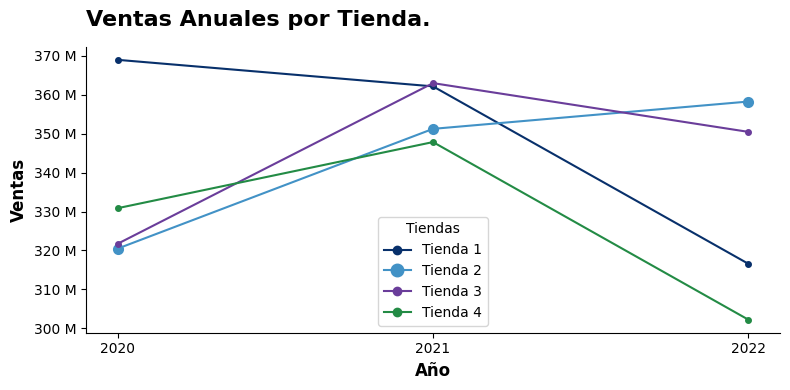

In [9]:
#Código para calcular las ventas anuales por tienda.

#Definiendo diccionario tienda_venta_year para organizamos las ventas anuales por tienda
tienda_venta_year = {}
#Función ventas_anuales para calculas las ventas anuales por tienda.
def ventas_anuales(tienda, df):
  ventas = df[['Precio', 'Año']]
  for año in periodos_años:
      total = (
          ventas[ventas['Año'] == año]
          .groupby('Año')['Precio']
          .sum()
        )
      if not total.empty:
          tienda_venta_year[(tienda, año)] = total.iloc[0]
      else:
          tienda_venta_year[(tienda, año)] = 0


#Declaramos función ventas_anuales para todas las tiendas.
for tienda, df in zip(nombre_tienda,base_tienda):
    ventas_anuales(tienda, df)

#Unimos información de diccionario tienda_venta_year en df_ventas_resumen.
df_ventas_resumen = pd.Series(tienda_venta_year).unstack(level=0)

#Visualización de resultados para ventas anuales por tienda.
print("💰🗓️🏪 Ventas Anuales por Tienda.\n")
display(df_ventas_resumen)

print(f"\n\n")
#Gráfico de líneas para ventas anuales por tienda.

def graficar_ventas_anuales_tiendas(tienda_venta_year):
    datos = {}

    # Llenamos: datos[tienda][año] = ventas
    for (tienda, año), valor in tienda_venta_year.items():
        if tienda not in datos:
            datos[tienda] = {}
        datos[tienda][año] = valor

    # Aseguramos orden en los años y excluimos 2023
    todos_los_años = sorted({año for _, año in tienda_venta_year if año != 2023})
    tiendas = list(datos.keys())

    # Colores fijos por tienda
    colores_tiendas = {
        'Tienda 1': '#08306b',   # Azul oscuro
        'Tienda 2': '#4292c6',   # Azul claro
        'Tienda 3': '#6a3d9a',   # Morado
        'Tienda 4': '#238b45'    # Verde
    }

    fig, ax = plt.subplots(figsize=(8, 4))

    # Graficamos una línea por tienda
    for tienda in tiendas:
        ventas_por_año = [datos[tienda].get(año, 0) for año in todos_los_años]
        color = colores_tiendas.get(tienda, '#999999')  # color de la línea

        if tienda == 'Tienda 1':
            marcador = '.'
            facecolor = color
            borde = color
        elif tienda == 'Tienda 4':
            marcador = '.'
            facecolor = '#238b45'  # verde distintivo para el marcador
            borde = '#238b45'
        elif tienda == 'Tienda 3':
            marcador = '.'
            facecolor = color
            borde = color
        else:  # Tienda 2
            marcador = 'o'
            facecolor = color
            borde = color

        ax.plot(
            todos_los_años,
            ventas_por_año,
            marker=marcador,
            color=color,
            markerfacecolor=facecolor,
            markeredgecolor=borde,
            markeredgewidth=2
        )

    # Para visualizar etiqueta en millones.
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f} M'))

    ax.set_xlabel('Año', fontsize=12, fontweight='bold')
    ax.set_ylabel('Ventas', fontsize=12, fontweight='bold')
    ax.set_title('Ventas Anuales por Tienda.', loc='left', fontsize=16, fontweight='bold', pad=15)
    ax.set_xticks(todos_los_años)

    # 🔷 Crear leyenda con marcadores correctos
    legend_elements = [
        Line2D([0], [0], color=colores_tiendas['Tienda 1'], marker='.', markersize=10,
               markerfacecolor=colores_tiendas['Tienda 1'], markeredgecolor=colores_tiendas['Tienda 1'], markeredgewidth=2, label='Tienda 1'),
        Line2D([0], [0], color=colores_tiendas['Tienda 2'], marker='o', markersize=8,
               markerfacecolor=colores_tiendas['Tienda 2'], markeredgecolor=colores_tiendas['Tienda 2'], markeredgewidth=2, label='Tienda 2'),
        Line2D([0], [0], color=colores_tiendas['Tienda 3'], marker='.', markersize=10,
               markerfacecolor=colores_tiendas['Tienda 3'], markeredgecolor=colores_tiendas['Tienda 3'], markeredgewidth=2, label='Tienda 3'),
        Line2D([0], [0], color=colores_tiendas['Tienda 4'], marker='.', markersize=10,
               markerfacecolor='#238b45', markeredgecolor='#238b45', markeredgewidth=2, label='Tienda 4'),
    ]

    ax.legend(handles=legend_elements, title='Tiendas')

    # 🔷 Remover bordes superior y derecho
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig("grafico_ventas_anuales_tienda.png", dpi=300, bbox_inches='tight')
    plt.show()


#Graficar.
graficar_ventas_anuales_tiendas(tienda_venta_year)


In [10]:
### 📉 Análisis de Tendencias Anuales por Tienda
"""
**🔎 Indicadores visuales en el gráfico:**
Cada tienda se representa con un color distintivo. La **dirección de la línea** refleja su tendencia (ascendente o descendente) y el **tamaño del marcador** indica estabilidad:
- Un **marcador pequeño** representa una tienda con ventas variables y/o con tendencia descendente, ya sea reciente o sostenida.
- Un **marcador grande** representa una tienda con tendencia de crecimiento sostenido en el tiempo.

---

**🔎 Tienda 1 – Tendencia descendente con alto volumen inicial:**
Parte como líder en 2020 con el mayor volumen de ventas. Sin embargo, desde 2021 muestra una **tendencia marcadamente descendente**, que se acentúa en 2022.
Esto podría indicar pérdida de mercado, problemas operativos o cambios en la demanda que requieren atención.
A pesar de la caída sostenida, su liderazgo en volumen acumulado parece deberse a las altas ventas obtenidas exclusivamente en 2020.

**🔎 Tienda 2 – Tendencia positiva sostenida:**
Comienza en 2020 como la tienda con menor nivel de ventas. Desde 2021 presenta una **tendencia de crecimiento continuo**, ubicándose como la tienda con **mejor desempeño en 2022**.
Se posiciona como un referente positivo para identificar **buenas prácticas o condiciones comerciales favorables**.

**🔎 Tienda 3 – Crecimiento con leve reversión:**
Inicia como la segunda tienda con menores ventas, pero en 2021 logra un crecimiento notable, casi igualando a Tienda 1.
En 2022 su tendencia cambia levemente, mostrando una **caída moderada**, aunque se mantiene como la segunda tienda con mayor volumen acumulado.

**🔎 Tienda 4 – Caída sostenida:**
Comienza como la segunda tienda con mayor volumen de ventas. Aunque en un inicio mostró señales de crecimiento, este fue menos pronunciado.
En 2021 es superada por Tiendas 2 y 3, y en 2022 sus ventas **caen abruptamente**, quedando como la tienda con **menor volumen total**, incluso por debajo de Tienda 1.

---

### 🧠 Conclusiones preliminares:

**🔎 T2 destaca con rendimiento positivo:**
Actualmente es la tienda con tendencia más sólida al alza desde 2020 y ocupa la segunda posición en volumen total.

**🔎 T1 con rendimiento cuestionable:**
Su liderazgo en ventas totales se debe exclusivamente a las cifras de 2020. Desde entonces, su tendencia ha sido consistentemente negativa.

**🔎 Es necesario evaluar las condiciones internas:**
Para comprender el rendimiento de cada tienda, se requiere mayor información sobre su operación, estrategia y entorno comercial.

**🔎 Posible replicación de buenas prácticas:**
Si las tiendas comparten un modelo de negocio similar, se sugiere al Sr. Juan estudiar qué está haciendo bien T2 y considerar **replicar sus prácticas** en el resto.

**🔎 Clasificación preliminar de desempeño:**
De forma exploratoria, se identifica:
- Una tienda con rendimiento positivo (T2)
- Una tienda con rendimiento intermedio (T3)
- Dos tiendas con rendimiento negativo (T1 y T4)
"""
print()

----------------------------------------------------------------------------------

###**🖱️Ventas por Categoría y Tienda.**

-------------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Identificar cuáles son las categorías de productos que generan mayores ventas en cada tienda. Este análisis permite comprender el enfoque comercial de cada local y detectar qué líneas de productos tienen mayor aceptación o demanda por parte de los clientes y por ende mayores ingresos.

**🧠 Interpretación esperada:**

* Una categoría con mayores ventas sugiere que la tienda está bien posicionada en ese tipo de producto o que existe alta demanda en su mercado local.

* Ayuda a evaluar la estrategia de inversión y oferta de productos de la tienda: en qué está apostando más para obtener mayor margen de ganancia.

* También permite comparar si todas las tiendas siguen un patrón similar o si alguna depende demasiado de una sola categoría (lo que puede ser un riesgo).

* Si una categoría genera bajo margen de ganancia en una tienda pero es fuerte en otra, podría indicar una oportunidad de mejora o expansión en el surtido.

In [11]:
#Código cálculo de ventas totales por categoría y tienda.
#Contiene las ventas totales por categoría y tienda.
vt_categoria_tienda = {}
#Definimos función venta_categoria_tienda para calcular las ventas totales por categoría en cada tienda.
def venta_categoria_tienda(base,tienda):
  global vt_categoria_tienda
  vt_cat_t = pd.Series(base.groupby('Categoría del Producto')['Precio'].sum(),name= tienda).sort_values(ascending=False)
  vt_categoria_tienda[tienda] = vt_cat_t
  return vt_categoria_tienda

#Declaramos fución venta_categoria_tienda para  cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  venta_categoria_tienda(base,tienda)

#df_vta_categoria_tienda_consolidado almacena de las ventas totales por categoría y tienda.
df_vta_categoria_tienda_consolidado = pd.DataFrame(vt_categoria_tienda)

#Función resumen_vta_cat_tienda crea visualización de resultados para las ventas por categoría y tienda.
def resumen_vta_cat_tienda(tienda,df_emoji):
  datos_tienda1 = vt_categoria_tienda.get(tienda).items()
  for (cat,valor),emoji in zip(datos_tienda1,df_emoji):
    print(f'{cat:>25}:  $ {valor:>12,.0f} {emoji}')

#Visualización del resumen de ventas totales por categoría y tienda.
print(f'💰 Ventas Totales por Categoría y Tienda.\n')
for tienda in nombre_tienda:
  print(f'🏪 {tienda}:')
  resumen_vta_cat_tienda(tienda,emojis_ranking_categorias)
  print('\n')

💰 Ventas Totales por Categoría y Tienda.

🏪 Tienda 1:
             Electrónicos:  $  429,493,500 1️⃣
        Electrodomésticos:  $  363,685,200 2️⃣
                  Muebles:  $  187,633,700 3️⃣
   Instrumentos musicales:  $   91,299,000 4️⃣
     Deportes y diversión:  $   39,290,000 5️⃣
                 Juguetes:  $   17,995,700 6️⃣
  Artículos para el hogar:  $   12,698,400 7️⃣
                   Libros:  $    8,784,900 8️⃣


🏪 Tienda 2:
             Electrónicos:  $  410,831,100 1️⃣
        Electrodomésticos:  $  348,567,800 2️⃣
                  Muebles:  $  176,426,300 3️⃣
   Instrumentos musicales:  $  104,990,300 4️⃣
     Deportes y diversión:  $   34,744,500 5️⃣
                 Juguetes:  $   15,945,400 6️⃣
  Artículos para el hogar:  $   14,746,900 7️⃣
                   Libros:  $   10,091,200 8️⃣


🏪 Tienda 3:
             Electrónicos:  $  410,775,800 1️⃣
        Electrodomésticos:  $  329,237,900 2️⃣
                  Muebles:  $  201,072,100 3️⃣
   Instrumentos musicales

In [12]:
#Análisis preliminar de las Ventas por Categoría y Tienda.
#Generamos resumen de número de categorías por tienda.
print(f"Análisis preliminar de las Ventas por Categoría y Tienda.\n")
print(f"Número de Categorías por Tienda.\n")

for tienda,base in zip(nombre_tienda,base_tienda):
  cat_n = base['Categoría del Producto'].nunique()
  print(f'🏪 {tienda}: {cat_n} categorías.')


#Comparando categorías entre tiendas.
#Crear conjunto todas_categorias.
todas_categorias = set()
for tienda in base_tienda:
    todas_categorias.update(tienda['Categoría del Producto'].unique())

todas_categorias = sorted(todas_categorias)  # para ordenarlas

#tabla_resumen_categorias contiene un DataFrame vacío para rellenar con check o X
tabla_resumen_categorias = pd.DataFrame(index=todas_categorias)

#Llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    categorias_tienda = tienda['Categoría del Producto'].unique()
    tabla_resumen_categorias[nombre] = tabla_resumen_categorias.index.map(
        lambda x: '✔️' if x in categorias_tienda else '✖️'
    )

#Definir indice y nombre de la tabla resumen.
tabla_resumen_categorias.index.name = 'Categoría'
tabla_resumen_categorias.reset_index(inplace=False)

#Visualizar resultado para categorías comunes entre tiendas.
print('\n\n📦 Categorías Comunes entre Tiendas.\n')
print(tabla_resumen_categorias)

##Matriz de comparación del mix por categoría.
#df_vta_categoria_tienda_consolidado
df_base_consolidado_vta_categoria_tienda = pd.concat(vt_categoria_tienda,names=['Tienda']).reset_index()
df_base_consolidado_vta_categoria_tienda.columns = ['Tienda','Categoría_producto','Ventas']
df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda.groupby('Tienda')['Ventas'].transform('sum')
df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Ventas'] / df_base_consolidado_vta_categoria_tienda['Ventas_Totales']
#df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda['Ventas_Totales'].map('{:,.0f}'.format)
#df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Participación'].map('{:.2%}'.format)
#Visualización resumen de participación de las ventas por categoría en las ventas totales.
df_resument_participacion_vta_categoria = df_base_consolidado_vta_categoria_tienda.pivot(index='Categoría_producto',columns='Tienda',values='Participación')
# Ordenar por el valor máximo en cualquier tienda
df_resument_participacion_vta_categoria = df_resument_participacion_vta_categoria.loc[
    df_resument_participacion_vta_categoria.max(axis=1).sort_values(ascending=False).index
]

# Copia del resumen original para no modificarlo.
df_con_acumulado = df_resument_participacion_vta_categoria.copy()

#Cálculo acumulado orden descendente para cada tienda.
for tienda in df_con_acumulado.columns:
    # Ordenar los índices participación.
    orden = df_con_acumulado[tienda].sort_values(ascending=False).index
    # Crear acumulado ordenado.
    acumulado = df_con_acumulado.loc[orden, tienda].cumsum()
    # Crear una nueva columna para el acumulado y volver al mismo orden de índice original.
    df_con_acumulado[f'Acumulado_{tienda}'] = acumulado.reindex(df_con_acumulado.index)

#Visualización para el resumen de participación de las ventas por categoría en las ventas totales..
print(f"\n\n📈💰🛒📦 Contribución por Categoría en las Ventas Totales por Tienda y su Acumulado.\n")
display(df_con_acumulado)


def contar_categorias_80(columna):
    # Ordenar de mayor a menor participación
    ordenadas = columna.sort_values(ascending=False)
    # Sumar acumulativamente
    acumulado = ordenadas.cumsum()
    # Contar cuántas categorías suman hasta el 80%
    return (acumulado <= 0.86).sum()

#Declarar función categorias_80_por_tienda por tienda.
categorias_80_por_tienda = df_resument_participacion_vta_categoria.apply(contar_categorias_80, axis=0)

#Visualización para número de categorías que concentran el 80% del mix.
print(f"\n\n🔝🛒📦 Número de Categorías que Concentran el 80% del Mix.\n")
categorias_80_por_tienda = categorias_80_por_tienda.to_frame(name='Categorías hasta 80%')
display(categorias_80_por_tienda)


Análisis preliminar de las Ventas por Categoría y Tienda.

Número de Categorías por Tienda.

🏪 Tienda 1: 8 categorías.
🏪 Tienda 2: 8 categorías.
🏪 Tienda 3: 8 categorías.
🏪 Tienda 4: 8 categorías.


📦 Categorías Comunes entre Tiendas.

                        Tienda 1 Tienda 2 Tienda 3 Tienda 4
Categoría                                                  
Artículos para el hogar       ✔️       ✔️       ✔️       ✔️
Deportes y diversión          ✔️       ✔️       ✔️       ✔️
Electrodomésticos             ✔️       ✔️       ✔️       ✔️
Electrónicos                  ✔️       ✔️       ✔️       ✔️
Instrumentos musicales        ✔️       ✔️       ✔️       ✔️
Juguetes                      ✔️       ✔️       ✔️       ✔️
Libros                        ✔️       ✔️       ✔️       ✔️
Muebles                       ✔️       ✔️       ✔️       ✔️


📈💰🛒📦 Contribución por Categoría en las Ventas Totales por Tienda y su Acumulado.



Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Acumulado_Tienda 1,Acumulado_Tienda 2,Acumulado_Tienda 3,Acumulado_Tienda 4
Categoría_producto,,,,,,,,
Electrónicos,0.373187,0.368015,0.374106,0.394343,0.373187,0.368015,0.374106,0.394343
Electrodomésticos,0.316006,0.312241,0.299847,0.272792,0.689193,0.680256,0.673953,0.667135
Muebles,0.163035,0.158039,0.183123,0.185414,0.852228,0.838295,0.857076,0.852548
Instrumentos musicales,0.079330,0.094048,0.070473,0.072327,0.931558,0.932343,0.927549,0.924875
Deportes y diversión,0.034139,0.031123,0.032416,0.032118,0.965697,0.963467,0.959964,0.956992
Juguetes,0.015636,0.014284,0.017669,0.019513,0.981333,0.977750,0.977634,0.976506
Artículos para el hogar,0.011034,0.013210,0.013716,0.014517,0.992367,0.990960,0.991349,0.991023
Libros,0.007633,0.009040,0.008651,0.008977,1.000000,1.000000,1.000000,1.000000




🔝🛒📦 Número de Categorías que Concentran el 80% del Mix.



,Categorías hasta 80%
Tienda,
Tienda 1,3
Tienda 2,3
Tienda 3,3
Tienda 4,3


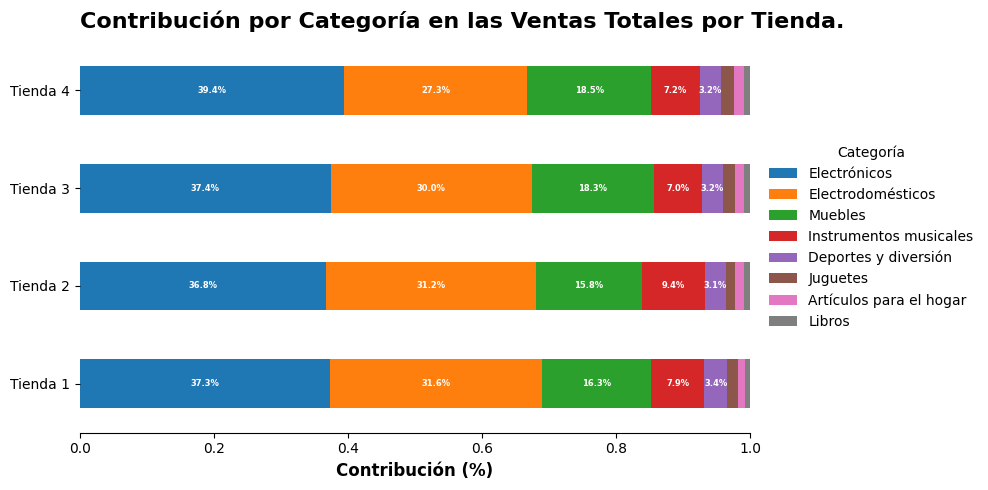

In [13]:
#Gráfico de barra apilada horizontal para visualizar la contribuciín por categoría en las ventas totales.
fig, ax = plt.subplots(figsize=(10, 5))

# Copia del DataFrame sin nombre en el índice
df_plot = df_resument_participacion_vta_categoria.T.copy()
df_plot.index.name = None  # Elimina el texto "Tienda" del eje Y

# Gráfico de barras horizontales apiladas
df_plot.plot(kind='barh', stacked=True, ax=ax)

# Etiquetas internas
for contenedor in ax.containers:
    valores = contenedor.datavalues
    etiquetas = [f'{v*100:.1f}%' if v > 0.02 else '' for v in valores]
    ax.bar_label(contenedor, labels=etiquetas, label_type='center',
                 color='white', fontsize=6, fontweight='bold')

# Ejes y título
ax.set_xlim(0, 1.0)
ax.set_xlabel("Contribución (%)", fontsize=12, fontweight='bold')
ax.set_title("Contribución por Categoría en las Ventas Totales por Tienda.", loc='left', fontsize=16, fontweight='bold', pad=10)

# Leyenda
ax.legend(title="Categoría", bbox_to_anchor=(1.01, 0.5), loc='center left', frameon=False)

# Ocultar bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("grafico_contribucion_categorias_tienda.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
"""
Análisis preliminar de Ventas por Categoría y Tienda.

🔎 Estructura de categorías idéntica:**
Al comparar las categorías de productos entre tiendas, observamos que son **idénticas tanto en cantidad como en tipo**:
todas trabajan con **8 categorías**  (actualmente se desconoce el número exacto de productos por categoría).

🔎 Orden de prioridad constante:**
Al ordenar las ventas por categoría de forma descendente, el **orden de prioridad** se mantiene igual entre tiendas, aunque los **valores absolutos** de ventas difieren.
Esto sugiere un **patrón comercial común**, pero con diferentes niveles de intensidad por tienda.

🔎 Participación por categoría:**
Se calculó la participación de cada categoría en el total de ventas por tienda para evaluar el **grado de diversificación** del mix de productos.
Los resultados muestran que **el 80 % de las ventas en cada tienda provienen únicamente de 3 categorías**: **Electrónicos,Electrodomésticos y Muebles.**.

🔎 Riesgo de concentración:**
Este hallazgo indica que las cuatro tiendas comparten un **alto nivel de concentración** en su portafolio, lo que implica un **vulnerabilidad comercial y riesgo estratégico**, ya que dependen en gran medida de un subconjunto limitado de categorías.
Sus ventas son excesivamente concentradas.
Al apoyarnos con el gráfico vemos que T2 es la que tiene mejor distribución de ventas en su mix, pero no es lo suficiente para salir del umbral de riesgo del resto de tiendas.
---

Recomendación:

🔎 Complementar análisis a nivel de producto:**
Se sugiere complementar este análisis con el de **productos más y menos vendidos** para confirmar si el **catálogo es igualmente homogéneo** a nivel de producto y verificar si el **riesgo de concentración** persiste más allá del nivel de categoría.
"""
print()

---------------------------------------------------------------------------------

###**🖱️ Productos Más y Menos Vendidos por Tienda.**


-----------------------------------------------------------------------

🎯 **Objetivo del cálculo:**

Determinar qué productos tienen mayor y menor volumen de ventas en cada tienda. Este análisis permite identificar los productos con alta o baja rotación, es decir, qué tan frecuentemente se venden.

**🧠 Interpretación esperada:**

* Un producto muy vendido (alta rotación) puede ser indicativo de popularidad, accesibilidad en precio o fuerte necesidad del cliente.

* Un producto con pocas ventas puede deberse a:

 Falta de promoción, Alto precio,Baja demanda local.

* Sin embargo, una alta rotación no garantiza rentabilidad: si el margen de ganancia es bajo, el producto podría no contribuir significativamente a las utilidades.

* Este análisis es útil para revisar la eficiencia del mix de producto y para evaluar si ciertos productos justifican su espacio en inventario o deberían ser reemplazados.

In [15]:
#Código para calcular los productos más y menos vendidos por tienda.
#Diccionarios contienen la información de las ventas totales pro producto y categoría, los más y menos vendidos.
vta_producto_tienda = {}
top3_mas_vendidos = {}
top3_menos_vendidos = {}

"""
Función venta_producto_tienda calcula las ventas totales por producto y las guarda en el diccionario vta_producto_tienda.
selecciona los 3 productos más vendidos y los guarda en el diccionario top3_mas_vendidos.
selecciona los 3 productos menos vendidos y los guarda en el diccionario top3_menos_vendidos.
"""
def venta_producto_tienda(base,tienda):
  global vta_producto_tienda
  global top3_mas_vendidos
  global top3_menos_vendidos

  vt_producto = pd.DataFrame(base.groupby('Producto')['Precio'].sum())
  vta_producto_tienda[tienda] = vt_producto

  p_mas_v = vt_producto.nlargest(3,'Precio')
  p_mas_v.rename(columns={'Precio':'Ventas'},inplace=True)
  top3_mas_vendidos[tienda] = p_mas_v

  p_menos_v = vt_producto.nsmallest(3,'Precio')
  p_menos_v.rename(columns={'Precio':'Ventas'},inplace=True)
  top3_menos_vendidos[tienda] = p_menos_v

  return

#Declaramos función venta_producto_tienda para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  venta_producto_tienda(base,tienda)

#Función resumen_vta_producto_mas_menos crea visualización de resultados para las ventas por producto y tienda.
def resumen_vta_producto_mas_menos(tienda,df_mas_v,df_menos_v,emoji_mas,emoji_menos):
  v_mas = df_mas_v[tienda].values
  p_mas = df_mas_v[tienda].index

  v_menos = df_menos_v[tienda].values
  p_menos = df_menos_v[tienda].index

  print(f"🏪 {tienda}\n")
  print(f"🛍️🏅 Productos Más Vendidos:")
  for p,valor,emoji in zip(p_mas,v_mas,emoji_mas):
    vt = valor[0]
    print(f"{p:>18} $ {vt:>15,.1f} COP {emoji}")
  print()
  print(f"Productos Menos Vendidos:")
  for p,valor,emoji in zip(p_menos,v_menos,emoji_menos):
    vt = valor[0]
    print(f"{p:>18} $ {vt:>15,.1f} COP {emoji}")

#Declaramos función resumen_vta_producto_mas_menos visualizar resumen de las 4 tiendas.
print(f'💰 Productos Más y Menos Vendidos por Tienda.\n')
for tienda in nombre_tienda:
  resumen_vta_producto_mas_menos(tienda,top3_mas_vendidos,top3_menos_vendidos,emojis_ranking_productos,emojis_ranking_productos_descendente)
  print('\n')

💰 Productos Más y Menos Vendidos por Tienda.

🏪 Tienda 1

🛍️🏅 Productos Más Vendidos:
     TV LED UHD 4K $   142,150,200.0 COP 1️⃣
      Refrigerador $   112,143,300.0 COP 2️⃣
         Iphone 15 $    97,902,200.0 COP 3️⃣

Productos Menos Vendidos:
Cuerda para saltar $       652,800.0 COP 3️⃣
    Dinosaurio Rex $       688,900.0 COP 2️⃣
   Cubo mágico 8x8 $       696,900.0 COP 1️⃣


🏪 Tienda 2

🛍️🏅 Productos Más Vendidos:
         Iphone 15 $   113,225,800.0 COP 1️⃣
     TV LED UHD 4K $   103,375,000.0 COP 2️⃣
      Refrigerador $    97,632,500.0 COP 3️⃣

Productos Menos Vendidos:
   Cubo mágico 8x8 $       643,600.0 COP 3️⃣
    Dinosaurio Rex $       770,300.0 COP 2️⃣
Cuerda para saltar $       856,900.0 COP 1️⃣


🏪 Tienda 3

🛍️🏅 Productos Más Vendidos:
      Refrigerador $    99,889,700.0 COP 1️⃣
     TV LED UHD 4K $    96,669,100.0 COP 2️⃣
         Iphone 15 $    93,225,700.0 COP 3️⃣

Productos Menos Vendidos:
   Cubo mágico 8x8 $       640,400.0 COP 3️⃣
    Dinosaurio Rex $       79

In [16]:
#Análisis preliminar productos más y menos vendidos por tienda.
#Generamos resumen de número total de productos por categoría y tienda.
print(f"Análisis Preliminar Complementario del Mix de Producto por Categoría y Tienda.\n")
print(f"📦 Número Total de Productos por Categoría y Tienda.\n")

#produtos_unicos_categoria_tienda Contiene el número de productos únicos por categoría en cada tienda.
produtos_unicos_categoria_tienda = {}

#Función calcula el número de productos únicos por categoría en cada tienda.
def n_producto_categoria(base,tienda):
  np_cat = base.groupby('Categoría del Producto')['Producto'].nunique()
  produtos_unicos_categoria_tienda[tienda] = np_cat
  return

#Declaramos función n_producto_categoria para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  n_producto_categoria(base,tienda)

#Dataframe df_np_categortia contiene la información del diccionario produtos_unicos_categoria_tienda
df_np_categortia = pd.DataFrame(produtos_unicos_categoria_tienda)
display(df_np_categortia)
print()

#Obtener todos los productos q se venden en las tiendas.
#Crear conjunto todas_producto.
todos_producto_cat = set()
for tienda in base_tienda:
    todos_producto_cat.update(tienda['Producto'].unique())

t_p_cat = sorted(todos_producto_cat)  # para ordenarlas

# crear un DataFrame vacío
resumen_p_cat = pd.DataFrame(index=t_p_cat)

# llenar la tabla con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    producto_tienda = tienda['Producto'].unique()
    resumen_p_cat[nombre] = resumen_p_cat.index.map(
        lambda x: '✔️' if x in producto_tienda else '✖️'
    )

resumen_p_cat.index.name = 'Producto'
resumen_p_cat.reset_index(inplace=False)

print('\n\n📦 Productos Únicos y Comunes entre Tiendas.\n')
display(resumen_p_cat)

##Matriz de comparación del mix por categoría.
#df_vta_categoria_tienda_consolidado
df_base_consolidado_vta_categoria_tienda = pd.concat(vt_categoria_tienda,names=['Tienda']).reset_index()
df_base_consolidado_vta_categoria_tienda.columns = ['Tienda','Categoría_producto','Ventas']
df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda.groupby('Tienda')['Ventas'].transform('sum')
df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Ventas'] / df_base_consolidado_vta_categoria_tienda['Ventas_Totales']
#df_base_consolidado_vta_categoria_tienda['Ventas_Totales'] = df_base_consolidado_vta_categoria_tienda['Ventas_Totales'].map('{:,.0f}'.format)
#df_base_consolidado_vta_categoria_tienda['Participación'] = df_base_consolidado_vta_categoria_tienda['Participación'].map('{:.2%}'.format)
#Visualización resumen de participación de las ventas por categoría en las ventas totales.
df_resument_participacion_vta_categoria = df_base_consolidado_vta_categoria_tienda.pivot(index='Categoría_producto',columns='Tienda',values='Participación')
# Ordenar por el valor máximo en cualquier tienda
df_resument_participacion_vta_categoria = df_resument_participacion_vta_categoria.loc[
    df_resument_participacion_vta_categoria.max(axis=1).sort_values(ascending=False).index
]


#Catálogo de Productos por Tienda.
catalogo_productos = tienda1.groupby('Categoría del Producto')['Producto'].unique()

#Supongamos que ya tienes tu Serie agrupada:
#Catalogo_productos = tienda1.groupby('Categoría del Producto')['Producto'].unique()

#Extraer como listas.
listas = catalogo_productos.values  # listas de productos por categoría
categorias = catalogo_productos.index  # nombres de las categorías

#Transponer con relleno vacío para desigualdad de longitudes
transpuesta = list(zip_longest(*listas, fillvalue=''))

#Crear el DataFrame con columnas por categoría
df_catalogo_ejemplo = pd.DataFrame(transpuesta, columns=categorias)

#Catálogo de Productos.
print(f"\n\n📦 Catálogo de Productos por Tienda.\n\n")
display(df_catalogo_ejemplo)

Análisis Preliminar Complementario del Mix de Producto por Categoría y Tienda.

📦 Número Total de Productos por Categoría y Tienda.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,4,4,4,4
Deportes y diversión,6,6,6,6
Electrodomésticos,6,6,6,6
Electrónicos,10,10,10,10
Instrumentos musicales,4,4,4,4
Juguetes,7,7,7,7
Libros,4,4,4,4
Muebles,10,10,10,10





📦 Productos Únicos y Comunes entre Tiendas.



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,✔️,✔️,✔️,✔️
Armario,✔️,✔️,✔️,✔️
Asistente virtual,✔️,✔️,✔️,✔️
Auriculares,✔️,✔️,✔️,✔️
Auriculares con micrófono,✔️,✔️,✔️,✔️
Balón de baloncesto,✔️,✔️,✔️,✔️
Balón de voleibol,✔️,✔️,✔️,✔️
Batería,✔️,✔️,✔️,✔️
Bicicleta,✔️,✔️,✔️,✔️




📦 Catálogo de Productos por Tienda.




Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
0,Olla de presión,Bicicleta,Microondas,Asistente virtual,Batería,Juego de mesa,Ciencia de datos con Python,Mesa de comedor
1,Cubertería,Balón de voleibol,Lavavajillas,Auriculares,Guitarra eléctrica,Bloques de construcción,Dashboards con Power BI,Silla de oficina
2,Set de ollas,Vaso térmico,Lavadora de ropa,TV LED UHD 4K,Guitarra acústica,Muñeca bebé,Modelado predictivo,Kit de bancas
3,Set de vasos,Cuerda para saltar,Refrigerador,Impresora,Pandereta,Carrito de control remoto,Iniciando en programación,Cama box
4,,Mochila,Estufa,Tablet ABXY,,Ajedrez de madera,,Mesa de noche
5,,Balón de baloncesto,Secadora de ropa,Iphone 15,,Dinosaurio Rex,,Armario
6,,,,Auriculares con micrófono,,Cubo mágico 8x8,,Sofá reclinable
7,,,,Celular ABXY,,,,Sillón
8,,,,Smartwatch,,,,Mesa de centro
9,,,,Smart TV,,,,Cama king


In [17]:
#Código para el cálculo de la participacion de los productos más vendidos en las ventas totales por categoría.
#Diccionario guarda información  de los productos más vendidos por tienda (resumen de : participación, unidades vendidas)
vt_categoria_tienda_participacion = {}
# Función participación_vta_producto_categoria calcula participación de productos en las ventas por categoría por tienda.
def participación_vta_producto_categoria(base, tienda):
    global vt_categoria_tienda_participacion

    # Extraer columnas relevantes
    base_p_cat_vta = base[['Producto', 'Categoría del Producto', 'Precio']].copy()
    base_p_cat_vta['Categoría del Producto'] = base_p_cat_vta['Categoría del Producto'].str.strip()

    # Agrupar por producto y categoría → sumar ventas y contar unidades (1 registro = 1 unidad vendida)
    base_p_cat_vta_participacion = base_p_cat_vta.groupby(
        ['Producto', 'Categoría del Producto'], as_index=False
    ).agg(
        Precio=('Precio', 'sum'),
        Unidades=('Precio', 'count')  # contar registros = unidades vendidas
    )

    # Obtener ventas totales por categoría
    base_vta_categoria = vt_categoria_tienda[tienda]
    base_vta_categoria.index = base_vta_categoria.index.str.strip()

    # Mapear ventas de categoría y calcular participación
    base_p_cat_vta_participacion['Ventas_Categoría'] = base_p_cat_vta_participacion['Categoría del Producto'].map(base_vta_categoria)
    base_p_cat_vta_participacion['Participación'] = base_p_cat_vta_participacion['Precio'] / base_p_cat_vta_participacion['Ventas_Categoría']

    # Guardar resumen limpio
    df_resumen_participacion_producto_categoria = base_p_cat_vta_participacion[
        ['Producto', 'Categoría del Producto', 'Precio', 'Unidades', 'Ventas_Categoría', 'Participación']
    ]

    # Guardar en diccionario
    vt_categoria_tienda_participacion[tienda] = df_resumen_participacion_producto_categoria

    return

#Declaramos función para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  participación_vta_producto_categoria(base,tienda)

#Los más vendidos por tienda.
producto_mas_vta_tienda = {
     'Tienda 1': ['TV LED UHD 4K','Refrigerador','Iphone 15'],
     'Tienda 2': ['Iphone 15','TV LED UHD 4K','Refrigerador'],
     'Tienda 3': ['Refrigerador','TV LED UHD 4K','Iphone 15'],
     'Tienda 4': ['Iphone 15','TV LED UHD 4K','Smart TV']
 }

#Generar visualización para los productos más vendidos y su participación en las ventas totales por categoría.
print(f"🛍️🏅📦Participación de los Productos  Más Vendidos en el Total de Ventas por Categoría.\n\n")

for tienda in nombre_tienda:
    print(f"🏪 {tienda}\n")

    # Extraer resumen generado para esta tienda
    resumen_tienda = vt_categoria_tienda_participacion[tienda]

    # Filtrar solo los productos definidos en el diccionario
    productos_interes = producto_mas_vta_tienda[tienda]
    resumen_filtrado = resumen_tienda[
        resumen_tienda['Producto'].isin(productos_interes)
    ].copy()

    # Ordenar por participación (opcional)
    resumen_filtrado.sort_values(by='Participación', ascending=False, inplace=True)

    # Formatear columna de participación como porcentaje
    resumen_filtrado['Participación'] = resumen_filtrado['Participación'].map('{:.2%}'.format)

    # Mostrar tabla
    display(resumen_filtrado)
    print("\n")

🛍️🏅📦Participación de los Productos  Más Vendidos en el Total de Ventas por Categoría.


🏪 Tienda 1



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
48,TV LED UHD 4K,Electrónicos,142150200.0,60,429493500.0,33.10%
39,Refrigerador,Electrodomésticos,112143300.0,54,363685200.0,30.84%
25,Iphone 15,Electrónicos,97902200.0,49,429493500.0,22.79%




🏪 Tienda 2



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
39,Refrigerador,Electrodomésticos,97632500.0,49,348567800.0,28.01%
25,Iphone 15,Electrónicos,113225800.0,55,410831100.0,27.56%
48,TV LED UHD 4K,Electrónicos,103375000.0,45,410831100.0,25.16%




🏪 Tienda 3



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
39,Refrigerador,Electrodomésticos,99889700.0,50,329237900.0,30.34%
48,TV LED UHD 4K,Electrónicos,96669100.0,42,410775800.0,23.53%
25,Iphone 15,Electrónicos,93225700.0,46,410775800.0,22.70%




🏪 Tienda 4



,Producto,Categoría del Producto,Precio,Unidades,Ventas_Categoría,Participación
25,Iphone 15,Electrónicos,96697500.0,48,409476100.0,23.61%
48,TV LED UHD 4K,Electrónicos,90295300.0,40,409476100.0,22.05%
45,Smart TV,Electrónicos,82790400.0,54,409476100.0,20.22%


In [18]:
#Código para calcular facturación promedio por producto y tienda.
preciosXProducto = pd.DataFrame({'Tienda 1': tienda1.groupby('Producto')['Precio'].mean().round(0).astype(int),
                                 'Tienda 2': tienda2.groupby('Producto')['Precio'].mean().round(0).astype(int),
                                 'Tienda 3': tienda3.groupby('Producto')['Precio'].mean().round(0).astype(int),
                                 'Tienda 4': tienda4.groupby('Producto')['Precio'].mean().round(0).astype(int)})

preciosXProducto.sort_values(by='Tienda 1', ascending=False, inplace=True)
print(f"🛍️🏪 Facturación Media por Producto y Tienda.")

display(preciosXProducto)

🛍️🏪 Facturación Media por Producto y Tienda.


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
TV LED UHD 4K,2369170,2297222,2301645,2257382
Refrigerador,2076728,1992500,1997794,1980839
Iphone 15,1998004,2058651,2026646,2014531
Smart TV,1533002,1528550,1459950,1533156
Lavadora de ropa,1399651,1362496,1368074,1380621
Lavavajillas,1292810,1277554,1237785,1287193
Tablet ABXY,1134281,1277495,1217502,1260513
Secadora de ropa,1018317,1037107,1106629,1056555
Celular ABXY,989424,1016315,986809,1030041


In [19]:
"""
Análisis preliminar de productos más vendidos por categoría y tienda.
Para visualizar y comprender el mix de productos se retomó el cálculo de los productos más y menos vendidos por categoría y tienda y adicionalmente se calculó el número total de productos por categoría y tienda y se compararon entre sí.
* Además se compararon los producto por tipo y se construyó un check lista para evidenciar diferencias o similitudes. Concluyendo con la construcción de un catálogo de referencia utilizando como muestra la tienda con mayores ventas aparentes
(Tienda 1). Esta elección se hizo como paso previo a un análisis más profundo de la tendencia general de ventas.

A partir del análisis complementario del mix de productos por categoría y tienda, se desprenden las siguientes observaciones:
* Todas las tiendas analizadas comparten el mismo catálogo de productos por categoría, lo que indica una oferta homogénea a nivel estructural.
* Al contabilizar el número de productos por categoría en cada tienda, se verifica que son idénticos en magnitud,sin variaciones en cantidad entre tiendas(51 productos).
* También se extrajeron los tipos específicos de productos disponibles por tienda, y al compararlos, se concluye que son iguales en clase, es decir, las tiendas
  ofrecen los mismos productos individuales.
* Estos hallazgos perfilan a las 4 tiendas con un mismo modelo de negoción y estratégia comercial al menos en oferta lo cual nos facilita analizar el riesgo de concentración que ya habiamos detectado
  anivel de categoría pero ahora a nivel de producto.

De manera que retomamos la información de los productos con mayor facturacuón y calculamos su participación en las ventas totales por categoría.
Esto nos permitió tener una idea más clara sobre el grado de diversificación o concentración del mix, desde la perspectiva del comportamiento por producto.
* Al revisar los resultados, observamos que los productos más vendidos pertenecen, en su mayoría, a las dos categorías con mayor volumen de ventas: Electrónicos y Electrodomésticos, ocupando la primera y segunda posición respectivamente.
Ambas categorías están lideradas por productos comunes en las cuatro tiendas: TV LED UHD 4K e iPhone 15 en Electrónicos, y Refrigerador en Electrodomésticos (para las tiendas 1, 2 y 3).
* La Tienda 4 destaca por ser la única donde los productos más vendidos se concentran exclusivamente en una sola categoría: Electrónicos, que además es la de mayor venta general.
Esto representa una señal de mayor concentración de ventas, y por tanto, un mayor riesgo comercial, al depender fuertemente de un número reducido de productos en una única categoría.
* También se detectó que, aunque ciertos productos son comunes entre las tiendas, no todos ocupan la misma posición de venta más alta. Esto podría explicarse por diferencias en la cantidad de unidades vendidas o por variables del mercado como el precio, que afecta directamente el valor total de facturación.
* Finalmente, se comprobó que en las tiendas 1, 2 y 3, la suma de la participación de los productos de la categoría Electrónicos supera el 50% de las ventas de dicha categoría, lo que revela una alta concentración en apenas dos productos, considerando que el mix total de esa categoría está compuesto por 10 productos.
  La Tienda 4, por su parte, representa un caso aún más concentrado, ya que sus ventas se distribuyen principalmente entre solo tres productos de una sola categoría.
"""
print()

In [20]:
"""
### 🛍️ Análisis de Productos Más y Menos Vendidos

**🎯 Objetivo del cálculo:**
Determinar qué productos tienen **mayor y menor volumen de ventas en cada tienda**.
Este análisis permite identificar los productos con **alta o baja rotación**, es decir, qué tan frecuentemente se venden.

**🧠 Interpretación esperada:**
- Un producto muy vendido (alta rotación) puede indicar **popularidad**, **accesibilidad en precio** o **fuerte necesidad del cliente**.
- Un producto con pocas ventas puede deberse a:
  - Falta de promoción
  - Precio elevado
  - Baja demanda local
- Sin embargo, **una alta rotación no garantiza rentabilidad**: si el margen es bajo, podría no contribuir significativamente a las utilidades.
- Este análisis es útil para revisar la **eficiencia del mix de productos** y para evaluar si ciertos productos justifican su permanencia en el inventario.

---

### 🕵 Comentarios Preliminares:

**🔎 Comparación estructural del catálogo:**
Se realizó un análisis preliminar del mix de productos por categoría y tienda.
Los resultados muestran que **todas las tiendas comparten el mismo catálogo por categoría**, con **igual número de productos por categoría (51)** y sin diferencias de tipo.

**🔎 Construcción de catálogo de referencia:**
Se utilizó como muestra **Tienda 1** (por ser la de mayores ventas aparentes) para construir un **catálogo base**.
Esto facilitó la comparación entre tiendas y ayudó a comprobar la **homogeneidad del modelo de negocio**.

**🔎 Riesgo de concentración a nivel producto:**
Al calcular la participación de los productos más vendidos en las ventas totales por categoría, se detectó una **alta concentración** en apenas dos categorías:
**Electrónicos** y **Electrodomésticos**.

**🔎 Productos líderes comunes:**
Entre los productos más vendidos destacan:
- **TV LED UHD 4K** e **iPhone 15** en la categoría Electrónicos
- **Refrigerador** en la categoría Electrodomésticos (para tiendas 1, 2 y 3)

**🔎 Tienda 4 como caso atípico:**
Tienda 4 se diferencia al concentrar **todos sus productos más vendidos en una única categoría**: **Electrónicos**, lo que representa un riesgo aún mayor por su **alta dependencia **.

**🔎 Diferencias en liderazgo por tienda:**
Aunque algunos productos son comunes entre las tiendas, **no siempre ocupan la misma posición en el ranking de ventas**.
Esto puede explicarse por variaciones en:
- Número de unidades vendidas
- Precio final
- Condiciones del mercado local

**🔎 Alta concentración dentro de la categoría:**
En tiendas 1, 2 y 3, los productos más vendidos representan **más del 50 % del total de ventas de la categoría Electrónicos**, a pesar de que el mix completo incluye 10 productos.
Tienda 4 muestra un nivel de concentración aún mayor: sus ventas se distribuyen principalmente entre **solo tres productos** dentro de una sola categoría.

---

### 📌 Conclusión preliminar:

**🔎 Mix homogéneo pero concentración elevada:**
Las tiendas tienen **la misma oferta de productos**, pero muestran **una fuerte dependencia en pocos productos de categorías específicas**, lo cual representa un riesgo estratégico.

**🔎 Es necesario evaluar márgenes de ganancia:**
Para complementar este análisis, se recomienda incluir una evaluación de **rentabilidad por producto**, ya que una alta rotación no siempre implica utilidad.
Tenemos limitaciones de información para realizar esta evaluación.

**🔎 Posibilidad de ajustar surtido:**
Productos con baja rotación y margen bajo podrían ser **sustituidos o promocionados**, para mejorar la eficiencia del mix y reducir el riesgo de concentración excesiva.
**🔎 Toma de decisiones:**
No se identifican diferencias significativas entre tiendas que permitan concluir que **el riesgo de concentración** o **la vulnerabilidad estratégica** es menor en alguna de ellas,
y que esto explique el desempeño en ventas. Probablemente nos dan indicios de una demanda altamente focalizada, una base de clientes poco diversa de comportamiento homogéneo lo cual limita
el crecimiento potencial del negocio.
* Riesgo de saturación de la demanda actual, en algún momento esos productos clave pueden llegar a su techo de ventas. No hay espacio para escalar si no se diversifica.
* Se recomienda buscar más similitudes para confirmar las condiciones de tienda que nos permitan entender la demanda de los clientes y nos ayuden a explicar el riesgo de concentración.

"""
print()

--------------------------------------------------------------------------

###**🖱️ Valoración Media por Tienda.**

---------------------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Evaluar la experiencia general de compra que ofrecen las distintas tiendas, a través del promedio de calificaciones otorgadas por los clientes. Esto permite detectar niveles de satisfacción o posibles problemas en el servicio.

**🧠 Interpretación esperada:**

* Una valoración media alta sugiere que la tienda ofrece una buena experiencia de compra en terminos generales.

* Una valoración baja puede ser síntoma de deficiencias en uno o varios puntos del servicio, lo cual impacta negativamente en la percepción del cliente y en la imagen de la tienda.

* Aunque no está directamente ligado al ingreso, una mala experiencia puede afectar la fidelización y, a largo plazo, reducir las ventas.

* Comparar las valoraciones entre tiendas ayuda a identificar buenas prácticas y áreas críticas a mejorar.

In [21]:
#Código para calcular valoración media por tienda.
#notas_prom_tienda contiene las notas prom para todas las tiendas.
notas_prom_tienda = {}
#Función nota_prom calcula la nota promedio por tienda.
def nota_prom(base,tienda):
  global notas_prom_tienda
  nota_prom = round(base['Calificación'].mean(),2)
  notas_prom_tienda[tienda] = nota_prom
  return

#Declaramos nota_prom para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  nota_prom(base,tienda)

valor_notas = notas_prom_tienda.values()
item_tienda = notas_prom_tienda.keys()
escala_notas = sorted(tienda1['Calificación'].unique().tolist())

#emoji_significado_nota asigna un emoji que sugiere un semáforo y fignificado de nota.
def emoji_significado_nota(nota):
  for n in valor_notas:
    if nota == 5:
      return emoji_notas[0]
    elif nota >= 4:
      return emoji_notas[1]
    elif nota >= 3:
      return emoji_notas[2]
    else:
      return emoji_notas[3]

#Resumen para valoración media por tienda.
print(f"👤🏅 Valoración Media por Tienda\n")
print(f"Escala de Valoración por Tienda = {escala_notas}\n")
for tienda,valor in zip(item_tienda,valor_notas):
  nota = round(valor,2)
  print(f'🏪 {tienda:>5}: {nota:>5}  {emoji_significado_nota(nota)}')

👤🏅 Valoración Media por Tienda

Escala de Valoración por Tienda = [1, 2, 3, 4, 5]

🏪 Tienda 1:  3.98  🟡 Aceptable.
🏪 Tienda 2:  4.04  🟢 Buena.
🏪 Tienda 3:  4.05  🟢 Buena.
🏪 Tienda 4:   4.0  🟢 Buena.


In [22]:
#Calificación min y max en cada tienda.
#Definiendo función calificacion_min_max.
def calificacion_min_max(df, tienda):
    """
    Calcula la calificación
    """
    calificacion_min = df['Calificación'].min()
    calificacion_max = df['Calificación'].max()
    return calificacion_min, calificacion_max

#Definiendo diccionario calificacion_min_max_tienda contiene notas mín y máx por tienda.
calificacion_min_max_tienda = {}
for df, nombre in zip(base_tienda,nombre_tienda):
    calificacion_min_max_tienda[nombre] = calificacion_min_max(df, nombre)

#Obteniendo valores y claves del diccionario calificacion_min_max_tienda.
valores_notas = list(calificacion_min_max_tienda.values())
key_tiendas = calificacion_min_max_tienda.keys()

#Visualización para resultado Calificación min y max en cada tienda.
print(f"Notas Mínimas y Máximas por tienda.")
for key,valor in zip(key_tiendas,valores_notas):
  nota = valor
  nota_min,nota_max = nota
  print(f"🏪 {key}:\n\n\t🔴 Mínima: {nota_min} \n\t🔵 Máxima: {nota_max} \n")

Notas Mínimas y Máximas por tienda.
🏪 Tienda 1:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 2:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 3:

	🔴 Mínima: 1 
	🔵 Máxima: 5 

🏪 Tienda 4:

	🔴 Mínima: 1 
	🔵 Máxima: 5 



In [23]:
"""
Al revisar las calificaciones promedio por tienda, se observa que todas las tiendas se sitúan dentro de rangos aceptables o buenos (entre 3.9 y 4.4). Esto sugiere que, en términos generales, la experiencia de compra que ofrecen es positiva y no existen diferencias alarmantes entre ellas. Sin embargo, al observar los extremos de la escala, se detecta que todas las tiendas han recibido tanto notas máximas (5) como mínimas (1), lo que refleja una experiencia de cliente heterogénea que no queda del todo reflejada en el promedio.

Dado que las tiendas enfrentan un alto riesgo de concentración en productos y categorías específicas, es fundamental que el Sr. Juan mantenga o eleve la calidad de la experiencia de compra en esos productos clave, ya que de ellos depende el sostenimiento del negocio.

Actualmente, existen limitaciones para profundizar en el análisis: no se cuenta con comentarios de los clientes vinculados a las calificaciones. Esto impide conocer con certeza los motivos detrás de las notas altas o bajas.

Se recomienda:

Implementar mecanismos para recoger feedback cualitativo de los clientes (comentarios, encuestas, reseñas).

Realizar un análisis de correlación entre calificación y variables como categoría, producto, tiempos de entrega o canal de atención.

Usar esta información para detectar áreas críticas y mejorar puntos específicos del servicio.
"""
print()

--------------------------------------------------------------------------------

###**🖱️ Costo Promedio de Envío por Tienda.**

---------------------------------------------------------------------

**🎯 Objetivo del cálculo:**

Calcular el costo logístico promedio por venta en cada tienda. Esta métrica permite evaluar la eficiencia en la distribución, considerando ubicación, cobertura y volumen de pedidos.
Esta métrica también es útil para detectar oportunidades de optimización logística, especialmente si hay tiendas con ingresos similares pero costos mucho más altos.

🧠 Interpretación:

* Un costo de envío promedio elevado puede estar asociado a:

 Baja concentración de clientes en la zona (poca densidad de pedidos),

 Mala ubicación geográfica respecto a los centros de distribución,

 Problemas logísticos u operativos (derivado de problemas internos o acuerdos con proveedores de servicio).

* Una tienda con costos de envío más bajos generalmente tiene mejor eficiencia de reparto o una clientela más cercana o agrupada.

In [24]:
#Código para calcular el costo promedio de envío por tienda.
#costo_prom_tienda guarda el costo promedio de envío por cada tienda.
costo_prom_envio_tienda = {}
#Función costo_prom_envio calcula el costo promedio de envío por tienda.
def costo_prom_envio(base,tienda):
  costo = base['Costo de envío'].mean()
  costo_prom_envio_tienda[tienda] = costo
  return

#Declaramos función para cada tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  costo_prom_envio(base,tienda)

#Extraemos llaves y valores.
key_costo_prom_envio = costo_prom_envio_tienda.keys()
val_costo_prom_envio = costo_prom_envio_tienda.values()

#Visualización resumen costo promedio de envío por tienda.
print(f"💸🚚📦 Costo Promedio de Envío por Tienda.\n")
for tienda,costo in zip(key_costo_prom_envio,val_costo_prom_envio):
  print(f'🏪 {tienda}:  $ {costo:>10,.2f} CLP')

💸🚚📦 Costo Promedio de Envío por Tienda.

🏪 Tienda 1:  $  26,018.61 CLP
🏪 Tienda 2:  $  25,216.24 CLP
🏪 Tienda 3:  $  24,805.68 CLP
🏪 Tienda 4:  $  23,459.46 CLP


----------------------------------------------------------

##➕ Cálculos Exploratorios.

---------------------------------------------------------------------------

🎯 Objetivo del cálculo:

Conocer las diferencias o similitudes en las condiciones operativas de cada tienda con el fin de identificar elementos que aporten indicios para adoptar un enfoque que permita explicar las tendencias observadas en las ventas.

###**🖱️ Comparación de Formas de Pago por Tienda.**

In [25]:
#Cantidad de formas de pago por tienda.
print(f"🌐📱💵 💳 Cantidad de Formas de Pago por Únicas por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Método de pago'].nunique()
    print(f"\t🏪 {nombre_tienda[i]}: {n_metodo_pago} métodos de pago.")

#Comparando métodos de pago entre tiendas.
#Crear conjunto todos_metodo_pago.
todos_metodo_pago = set()
for tienda in base_tienda:
    todos_metodo_pago.update(tienda['Método de pago'].unique())

todos_metodo_pago = sorted(todos_metodo_pago)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_metodo_pago
tabla_resumen_metodo_pago = pd.DataFrame(index=todos_metodo_pago)

# llenar la tabla tabla_resumen_metodo_pago con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    metodo_tienda = tienda['Método de pago'].unique()
    tabla_resumen_metodo_pago[nombre] = tabla_resumen_metodo_pago.index.map(
        lambda x: '✔️' if x in metodo_tienda else '✖️'
    )
#Definir indice y nombre en tabla_resumen_metodo_pago'
tabla_resumen_metodo_pago.index.name = 'Opción de Pago'
tabla_resumen_metodo_pago.reset_index(inplace=False)

#Visualizar resultado para categorías comunes entre tiendas.
print(f'\n\n🌐📱💵 💳  Opciones de Pago Comunes entre Tiendas.\n')
print(tabla_resumen_metodo_pago)

🌐📱💵 💳 Cantidad de Formas de Pago por Únicas por Tienda.

	🏪 Tienda 1: 4 métodos de pago.
	🏪 Tienda 2: 4 métodos de pago.
	🏪 Tienda 3: 4 métodos de pago.
	🏪 Tienda 4: 4 métodos de pago.


🌐📱💵 💳  Opciones de Pago Comunes entre Tiendas.

                   Tienda 1 Tienda 2 Tienda 3 Tienda 4
Opción de Pago                                        
Cupón                    ✔️       ✔️       ✔️       ✔️
Nequi                    ✔️       ✔️       ✔️       ✔️
Tarjeta de crédito       ✔️       ✔️       ✔️       ✔️
Tarjeta de débito        ✔️       ✔️       ✔️       ✔️


###**🖱️ Comparación de Empleados por Tienda.**

In [26]:
#Código para calcular el número de vendedores por tienda.
print(f"👨‍💼👩‍💼 Número de Vendedores por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Vendedor'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} vendedores.")

👨‍💼👩‍💼 Número de Vendedores por Tienda.

🏪 Tienda 1: 14 vendedores.
🏪 Tienda 2: 14 vendedores.
🏪 Tienda 3: 14 vendedores.
🏪 Tienda 4: 14 vendedores.


In [27]:
#Código para comparar el nombre de los vendedores entre tiendas.
#Crear conjunto todos_nombres_vendedores.
todos_nombres_vendedores = set()
for tienda in base_tienda:
    todos_nombres_vendedores.update(tienda['Vendedor'].unique())

todos_nombres_vendedores = sorted(todos_nombres_vendedores)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_categorias
tabla_resumen_nombre_vendedor = pd.DataFrame(index=todos_nombres_vendedores)

# llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda, nombre_tienda):
    vendedores_tienda = tienda['Vendedor'].unique()
    tabla_resumen_nombre_vendedor[nombre] = tabla_resumen_nombre_vendedor.index.map(
        lambda x: '✔️' if x in vendedores_tienda else '✖️'
    )
#Definir indice y nombre'
tabla_resumen_nombre_vendedor.index.name = 'Vendedores'
tabla_resumen_nombre_vendedor.reset_index(inplace=False)
#Visualizar resultado para categorías comunes entre tiendas.
print('👨‍💼👩‍💼 Empleados de Ventas Comunes entre Tiendas.\n')
print(tabla_resumen_nombre_vendedor)

👨‍💼👩‍💼 Empleados de Ventas Comunes entre Tiendas.

                Tienda 1 Tienda 2 Tienda 3 Tienda 4
Vendedores                                         
Beatriz Morales       ✔️       ✔️       ✔️       ✔️
Blanca Ramirez        ✔️       ✔️       ✔️       ✔️
Camila Rivera         ✔️       ✔️       ✔️       ✔️
Felipe Santos         ✔️       ✔️       ✔️       ✔️
Izabela de León       ✔️       ✔️       ✔️       ✔️
Juan Fernandez        ✔️       ✔️       ✔️       ✔️
Juliana Costa         ✔️       ✔️       ✔️       ✔️
Lucas Olivera         ✔️       ✔️       ✔️       ✔️
Maria Alfonso         ✔️       ✔️       ✔️       ✔️
Mariana Herrera       ✔️       ✔️       ✔️       ✔️
Pedro Gomez           ✔️       ✔️       ✔️       ✔️
Rafael Acosta         ✔️       ✔️       ✔️       ✔️
Santiago Silva        ✔️       ✔️       ✔️       ✔️
Ángel Rodriguez       ✔️       ✔️       ✔️       ✔️


###**🖱️ Comparación de Zonas de Cobertura por Tienda.**

In [28]:
#Código para calcular el número de zonas de cobertura por tienda.
#Visualización para Números de zonas de cobertura por tienda
print(f"🗺️ 🏙️ 📍 Número de Zonas de Cobertura por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_metodo_pago = tienda['Lugar de Compra'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} zonas.")

🗺️ 🏙️ 📍 Número de Zonas de Cobertura por Tienda.

🏪 Tienda 1: 19 zonas.
🏪 Tienda 2: 19 zonas.
🏪 Tienda 3: 19 zonas.
🏪 Tienda 4: 19 zonas.


In [29]:
#Código para Comparar las zonas de cobertura entre tiendas.
#Crear conjunto todos_nombres_zonas.
todos_nombres_zonas = set()
for tienda in base_tienda:
    todos_nombres_zonas.update(tienda['Lugar de Compra'].unique())

todos_nombres_zonas = sorted(todos_nombres_zonas)  # para ordenarlas

# crear un DataFrame vacío tabla_resumen_categorias
tabla_resumen_nombre_zona = pd.DataFrame(index=todos_nombres_zonas)

# llenar la tabla tabla_resumen_categorias con ✔️ o ✖️
for tienda, nombre in zip(base_tienda,nombre_tienda):
    zonas_tienda = tienda['Lugar de Compra'].unique()
    tabla_resumen_nombre_zona[nombre] = tabla_resumen_nombre_zona.index.map(
        lambda x: '✔️' if x in zonas_tienda else '✖️'
    )
#Definir indice y nombre'
tabla_resumen_nombre_zona.index.name = 'Zonas'
tabla_resumen_nombre_zona.reset_index(inplace=False)
#Visualizar resultado para zonas comunes entre tiendas.
print('🗺️ 🏙️ 📍 Zonas de Cobertura Comunes entre Tiendas.\n')
print(tabla_resumen_nombre_zona)

🗺️ 🏙️ 📍 Zonas de Cobertura Comunes entre Tiendas.

              Tienda 1 Tienda 2 Tienda 3 Tienda 4
Zonas                                            
Armenia             ✔️       ✔️       ✔️       ✔️
Barranquilla        ✔️       ✔️       ✔️       ✔️
Bogotá              ✔️       ✔️       ✔️       ✔️
Bucaramanga         ✔️       ✔️       ✔️       ✔️
Cali                ✔️       ✔️       ✔️       ✔️
Cartagena           ✔️       ✔️       ✔️       ✔️
Cúcuta              ✔️       ✔️       ✔️       ✔️
Inírida             ✔️       ✔️       ✔️       ✔️
Leticia             ✔️       ✔️       ✔️       ✔️
Manizales           ✔️       ✔️       ✔️       ✔️
Medellín            ✔️       ✔️       ✔️       ✔️
Neiva               ✔️       ✔️       ✔️       ✔️
Pasto               ✔️       ✔️       ✔️       ✔️
Pereira             ✔️       ✔️       ✔️       ✔️
Riohacha            ✔️       ✔️       ✔️       ✔️
Santa Marta         ✔️       ✔️       ✔️       ✔️
Soacha              ✔️       ✔️       ✔️       ✔️

In [30]:
#Código para calcular el número de coordenadas geográficas únicas por tienda.

#Creamos columna coordenadas en cada base.
for tienda in base_tienda:
    tienda['Coordenadas'] = list(zip(tienda['lat'], tienda['lon']))

#Visualización para coordenadas geográficas únicas por tienda.
print(f"🌎 🗺️ 🧭 Número de Coordenadas Geográficas Únicas por Tienda.\n")
for i, tienda in enumerate(base_tienda):
    n_coordenadas = tienda['Coordenadas'].nunique()
    print(f"🏪 {nombre_tienda[i]}: {n_metodo_pago} zonas.")

🌎 🗺️ 🧭 Número de Coordenadas Geográficas Únicas por Tienda.

🏪 Tienda 1: 19 zonas.
🏪 Tienda 2: 19 zonas.
🏪 Tienda 3: 19 zonas.
🏪 Tienda 4: 19 zonas.


In [31]:
#Código para Comparar las Coordenadas GPS de los clientes de cada tienda.
#Creamos diccionario coordenadas_clientes_unicos.
coordenadas_clientes_unicos = {}
#Definiendo función coordenadas_cliente.
def coordenadas_cliente (df,tienda):
  df['cliente'] = list(zip(df['lat'], df['lon']))# crear una columna con la tupla de coordenadas
  coor_cliente = pd.DataFrame(df.groupby('Lugar de Compra')['cliente'].unique())# contar clientes únicos por tienda
  coor_cliente.rename(columns={'cliente': tienda}, inplace=True)
  coordenadas_clientes_unicos[tienda] = coor_cliente
  return
#Declarando función para cada tienda.
coordenadas_cliente(tienda1,nombre_tienda[0])
coordenadas_cliente(tienda2,nombre_tienda[1])
coordenadas_cliente(tienda3,nombre_tienda[2])
coordenadas_cliente(tienda4,nombre_tienda[3])

# Ahora concatenas datos de diccionario coordenadas_clientes_unicos.
df_coor_consolidado = pd.concat(coordenadas_clientes_unicos.values(), axis=1)
df_coor_consolidado = df_coor_consolidado.reset_index()

#Visualización resultados para análisis temporal total de costos de envío Store 1.
print(f"🌎 🚨 Comparación de las Coordenadas GPS de clientes por tienda.\n")

print(df_coor_consolidado.to_string(index=False))

🌎 🚨 Comparación de las Coordenadas GPS de clientes por tienda.

Lugar de Compra                Tienda 1                Tienda 2                Tienda 3                Tienda 4
        Armenia  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]  [(4.53389, -75.68111)]
   Barranquilla [(10.96854, -74.78132)] [(10.96854, -74.78132)] [(10.96854, -74.78132)] [(10.96854, -74.78132)]
         Bogotá  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]  [(4.60971, -74.08175)]
    Bucaramanga   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]   [(7.12539, -73.1198)]
           Cali   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]   [(3.43722, -76.5225)]
      Cartagena [(10.39972, -75.51444)] [(10.39972, -75.51444)] [(10.39972, -75.51444)] [(10.39972, -75.51444)]
         Cúcuta  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]  [(7.89391, -72.50782)]
        Inírida    [(3.8653, -67.9239)] 

In [32]:
#Código para crear un Check list de las coordenadas GPS por tienda.
# Ya tengo un diccionario lleno así:
# cordenadas_clientes_unicos = {}
# con DataFrames con índice Lugar de Compra y columna = coordenada (tupla)

# Concatenamos la información en cordenadas_clientes_unicos.
df_consolidado_coordenadas_clientes = pd.concat(coordenadas_clientes_unicos.values(), axis=1).reset_index()

# Tomamos la primera tienda como referencia
tienda_ref = list(coordenadas_clientes_unicos.keys())[0]

# Guardamos la coordenada de referencia para mostrar
df_consolidado_coordenadas_clientes['Coordenadas'] = df_consolidado_coordenadas_clientes[tienda_ref].apply(
    lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x
)

# Ahora comparamos correctamente
for tienda in coordenadas_clientes_unicos.keys():
    df_consolidado_coordenadas_clientes[tienda] = df_consolidado_coordenadas_clientes.apply(
        lambda row: '✔️' if (
            tuple(row[tienda]) if isinstance(row[tienda], (list, np.ndarray)) else row[tienda]
        ) == row['Coordenadas'] else '✖️',
        axis=1
    )

# Dejar las columnas ordenadas
columnas_finales = ['Lugar de Compra', 'Coordenadas'] + list(coordenadas_clientes_unicos.keys())
df_resumen = df_consolidado_coordenadas_clientes[columnas_finales]

# Mostrar
print(f"\n🌎 🏙️ 📍 Check List Comparativa Coordenadas GPS por Tienda ✔️ / ✖️\n")
print(df_resumen.to_string(index=False))


🌎 🏙️ 📍 Check List Comparativa Coordenadas GPS por Tienda ✔️ / ✖️

Lugar de Compra              Coordenadas Tienda 1 Tienda 2 Tienda 3 Tienda 4
        Armenia  ((4.53389, -75.68111),)       ✔️       ✔️       ✔️       ✔️
   Barranquilla ((10.96854, -74.78132),)       ✔️       ✔️       ✔️       ✔️
         Bogotá  ((4.60971, -74.08175),)       ✔️       ✔️       ✔️       ✔️
    Bucaramanga   ((7.12539, -73.1198),)       ✔️       ✔️       ✔️       ✔️
           Cali   ((3.43722, -76.5225),)       ✔️       ✔️       ✔️       ✔️
      Cartagena ((10.39972, -75.51444),)       ✔️       ✔️       ✔️       ✔️
         Cúcuta  ((7.89391, -72.50782),)       ✔️       ✔️       ✔️       ✔️
        Inírida    ((3.8653, -67.9239),)       ✔️       ✔️       ✔️       ✔️
        Leticia ((-4.21528, -69.94056),)       ✔️       ✔️       ✔️       ✔️
      Manizales  ((5.06889, -75.51738),)       ✔️       ✔️       ✔️       ✔️
       Medellín  ((6.25184, -75.56359),)       ✔️       ✔️       ✔️       ✔️
         

In [33]:
"""
Comentarios preliminares sobre los  hallazgos con los cálculos complementarios realizados.
* Al extraer y comparar las formas de pago disponibles en cada tienda, observamos que son idénticas en tipo.
* Al analizar y comparar la fuerza de ventas por tienda, se evidencia no solo que son equivalentes en número,
  sino que, al cruzar los nombres, los mismos empleados aparecen registrados en todas las tiendas. Lo cuál es inusual si se tratan de tiendas físicas. Si son tiendas virtuales, los mismos empleados
  atienden los despachos para las distintas tiendas, pero parece no ser estrategico operar como 4 tiendas diferentes.

Hasta este punto, se confirma que las condiciones de cada tienda en cuanto al modelo de negocio son consistentes y replicables, al menos con base en la información disponible.
Por lo tanto, es probable que las diferencias en los niveles de venta se expliquen por factores externos, como la ubicación de las tiendas y el perfil de la demanda.

"""
print()

In [34]:
"""
Observamos que cada tienda despacha exactamente a 19 ciudades dentro de Colombia. Lo preocupante es que parecen concordar exactamente en coordenadas gps, lo que implica que las 4 tiendas
comparten a 19 clientes. Las ventas de las 4 tiendas dependen de las compras de 19 clientes. Este elemento implica un riesgo alto de asolapamiento y canivalización.
Si las compras dependen de unos pocos clientes las ventas pueden caer abrutamente si se pierde a ese o esos clientes.
Verifiquemos nuestra hipótesis.

* Evidenciemos el impacto de las compras por cliente en las ventas totales por tienda: calculemos la cantidad de compras totales que han realizado.

"""
print()

###**🖱️ Compras Totales por Cliente y Tienda.**

In [35]:
#Código para calcular las compras totales por cliente y tienda.
#Asigna nombre de tiendas a cada base.
base_tienda_concatenar = {}
def asignar_nombre_tienda(base,tienda):
  global base_tienda_concatenar
  t = base.copy()
  t['Tienda'] = tienda
  base_tienda_concatenar[tienda] = t
  return
#Declaramos función para todas las bases de tienda.
for base,tienda in zip(base_tienda,nombre_tienda):
  asignar_nombre_tienda(base,tienda)

#Unificamos las bases para facilitar el cálculo.
base_tienda_concatenar = pd.concat(base_tienda_concatenar.values())

compras_cliente_consolidado = base_tienda_concatenar.copy()
compras_cliente_consolidado = compras_cliente_consolidado[['Precio','Lugar de Compra','cliente','Tienda','Año']]
compras_cliente_consolidado.rename(columns={'Precio':'Compra'}, inplace=True)

#facturacion_cliente_tienda contiene la información del total de facturación por cliente y tienda.
facturacion_cliente_tienda = {}

#facturacion_cliente calcula el total de las compras que realiza el cliente en cada tienda.
def facturacion_cliente (tienda):
  global facturacion_cliente_tienda

  tienda_compra_cliente = compras_cliente_consolidado[compras_cliente_consolidado['Tienda'] == tienda]
  tienda_compra_cliente_copia = tienda_compra_cliente.copy()
  tienda_compra_cliente_copia.drop(columns=['Tienda'],inplace=True)

  tienda_compra_cliente_copia = tienda_compra_cliente_copia.groupby(['cliente','Lugar de Compra'])['Compra'].sum()
  tienda_compra_cliente_copia = tienda_compra_cliente_copia.rename(tienda).to_frame()
  # Reordenar niveles del MultiIndex: poner 'Lugar de Compra' primero
  tienda_compra_cliente_copia = tienda_compra_cliente_copia.reorder_levels(['Lugar de Compra','cliente'])
  tienda_compra_cliente_copia = tienda_compra_cliente_copia.sort_values(by=tienda, ascending=False)
  facturacion_cliente_tienda[tienda] = tienda_compra_cliente_copia
  return

##Declaramos función para cada tienda.
for tienda in nombre_tienda:
  facturacion_cliente(tienda)

#Consolidamos la información del diccionario facturacion_cliente_tienda.
df_facturacion_cliente_tienda_unido = pd.concat(facturacion_cliente_tienda.values(), axis=1)

#Visualización para ompras totales por cliente y tienda.
print(f"🛒 🛍️ 💳💵Compras Totales por Cliente y Tienda.\n")
display(df_facturacion_cliente_tienda_unido)

🛒 🛍️ 💳💵Compras Totales por Cliente y Tienda.



,,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Lugar de Compra,cliente,,,,
Bogotá,"(4.60971, -74.08175)",440005000.0,479959200.0,475562100.0,419332000.0
Medellín,"(6.25184, -75.56359)",296858100.0,297246700.0,250580600.0,251983800.0
Cali,"(3.43722, -76.5225)",154493700.0,118257600.0,109287600.0,124487200.0
Pereira,"(4.81333, -75.69611)",56214300.0,43073800.0,62504500.0,64134700.0
Cúcuta,"(7.89391, -72.50782)",37879500.0,28991500.0,25165500.0,7332600.0
Barranquilla,"(10.96854, -74.78132)",32907700.0,27741300.0,36768500.0,34623000.0
Cartagena,"(10.39972, -75.51444)",22296700.0,21548300.0,34144100.0,24387600.0
Riohacha,"(11.54444, -72.90722)",18512700.0,12656400.0,19025900.0,23684700.0
Bucaramanga,"(7.12539, -73.1198)",17579200.0,23895600.0,23538900.0,25559600.0


In [36]:
#Código para calcular la participación de las compras del cliente en las ventas globales.
#realizamos copia de las ventas totales por cliente y tienda.
compras_cliente_consolidado_copia = compras_cliente_consolidado.copy()
#Declaramos 2 listas importantes.
#Definimos lista lista_cliente a los clientes únicos.
lista_cliente = list(compras_cliente_consolidado_copia['cliente'].unique())
#Definimos lista nombre_zona para las zonas donde habita el cliente.
nombre_zona = list(compras_cliente_consolidado_copia['Lugar de Compra'].unique())

# facturacion_year_cliente_tienda contiene la facturación anual por cliente y tienda.
facturacion_year_cliente_tienda = {}

#Función factura_cliente_tienda_year calcula la factura anual por cliente y tienda.
def factura_cliente_tienda_year(df, cliente, year, tienda):
  global facturacion_year_cliente_tienda
  facturacion_year_cliente_tienda = (
    compras_cliente_consolidado
    .groupby(['cliente', 'Tienda', 'Año'])['Compra']
    .sum()
    .to_dict()
)

# recorrer todos los clientes, años y tiendas
for cliente,year,tienda in zip(lista_cliente,periodos_años,nombre_tienda):
    for year in periodos_años:
        for tienda in nombre_tienda:
            factura_cliente_tienda_year(compras_cliente_consolidado, cliente, year, tienda)

zona_coor = compras_cliente_consolidado_copia.set_index('cliente')['Lugar de Compra'].to_dict()

# Crear las tuplas de datos con cliente = (zona, coordenada)
datos = [
    ((zona_coor[cliente], cliente), tienda, year, facturacion)
    for (cliente, tienda, year), facturacion in facturacion_year_cliente_tienda.items()
]

# Crear DataFrame a partir de la lista de tuplas
df_facturacion = pd.DataFrame(datos, columns=['cliente', 'tienda', 'año', 'facturacion'])

# Generar resumen
df_resumen = (
    df_facturacion
    .groupby(['cliente', 'tienda', 'año'])['facturacion']
    .sum()
    .reset_index()
    .pivot_table(index=['cliente', 'tienda'], columns='año', values='facturacion', fill_value=0)
    .reset_index()
)

# Calcular la columna de total de facturación
df_resumen['facturación_total'] = df_resumen.loc[:, df_resumen.columns[2:]].sum(axis=1)

#Filtraremos una muestra de los cuyas compras representan el 80% de las ventas totales.
#Visualicemos su aportación anual.

# primero identificamos las columnas de los años
cols_años = [col for col in df_resumen.columns if isinstance(col, int) or str(col).isdigit()]

# para cada año calculamos el total global de ventas en ese año
for año in cols_años:
    total_año = df_resumen[año].sum()
    df_resumen[f'%_vtas_{año}'] = (df_resumen[año] / total_año * 100).round(2)



#Agrego columna de acumulado.
# Filtrar las columnas que comienzan con '%_vtas_'
df_resumen.columns = df_resumen.columns.astype(str)

cols_participacion = [col for col in df_resumen.columns if col.startswith('%_vtas_')]

# Sumar las columnas por fila
df_resumen['participacion_acumulado'] = df_resumen[cols_participacion].sum(axis=1)

#Generemos visualización.
print(f"🛒 🛍️ 💳💵Compras Anuales, Participación Anual y Acumulada del Cliente (Bogotá, (4.60971, -74.08175)) en las Ventas Totales por Tienda.\n")
df_resumen[df_resumen['cliente'] == ('Bogotá', (4.60971, -74.08175))]

🛒 🛍️ 💳💵Compras Anuales, Participación Anual y Acumulada del Cliente (Bogotá, (4.60971, -74.08175)) en las Ventas Totales por Tienda.



año,cliente,tienda,2020,2021,2022,2023,facturación_total,%_vtas_2020,%_vtas_2021,%_vtas_2022,%_vtas_2023,participacion_acumulado
8,"(Bogotá, (4.60971, -74.08175))",Tienda 1,143234100.0,139762300.0,122604500.0,34404100.0,440005000.0,10.67,9.81,9.24,11.09,40.81
9,"(Bogotá, (4.60971, -74.08175))",Tienda 2,141428000.0,138239600.0,158417900.0,41873700.0,479959200.0,10.54,9.71,11.93,13.50,45.68
10,"(Bogotá, (4.60971, -74.08175))",Tienda 3,147736500.0,156318100.0,142820300.0,28687200.0,475562100.0,11.01,10.98,10.76,9.25,42.00
11,"(Bogotá, (4.60971, -74.08175))",Tienda 4,138585600.0,150117600.0,111997200.0,18631600.0,419332000.0,10.33,10.54,8.44,6.01,35.32


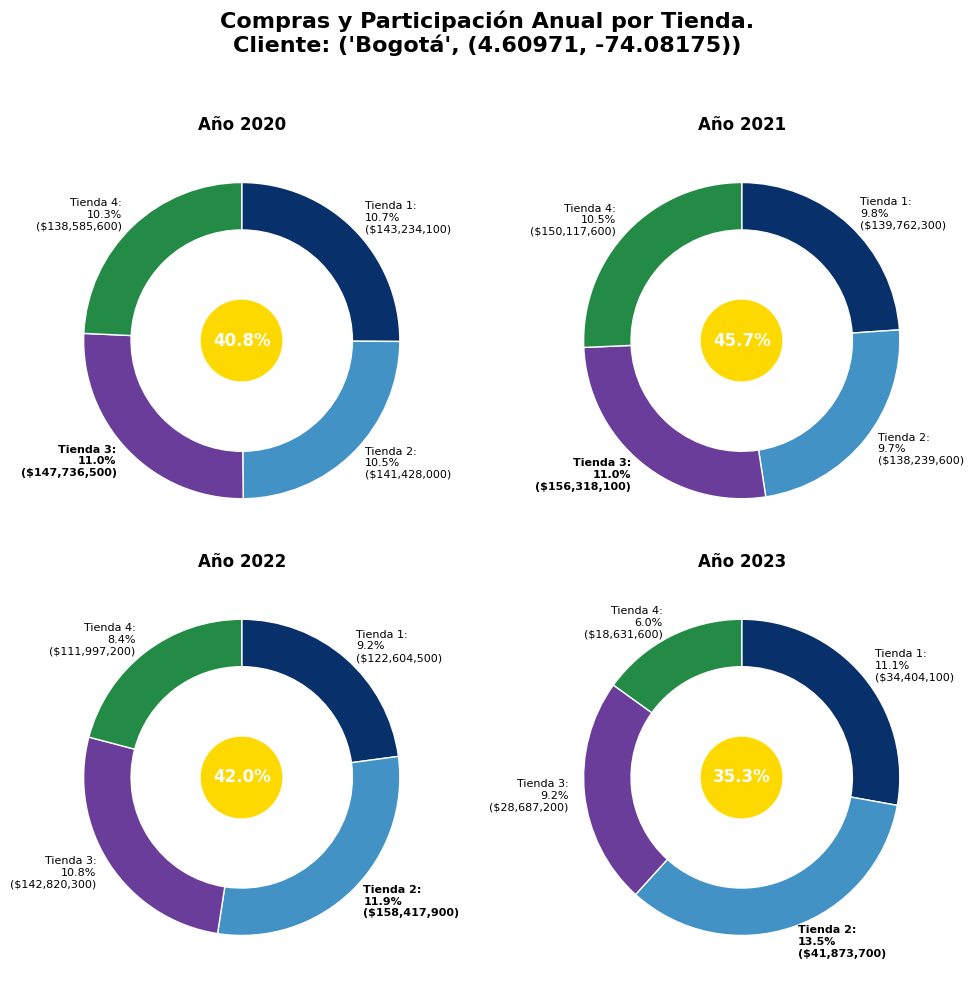

In [37]:
#Código para graficar las Compras y Participación Anual por Tienda y Cliente ('Bogotá', (4.60971, -74.08175)) .
#Importando imagen circulo amarillo para graficar.
url = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/circuloAmarillo.jpg"
img = Image.open(urllib.request.urlopen(url))
img_colorAmarillo_circulo = np.array(img)


# Filtrar cliente Bogotá
cliente_target = ('Bogotá', (4.60971, -74.08175))
datos_bogota = df_resumen[df_resumen['cliente'] == cliente_target].copy()

# Tiendas y colores
tiendas = datos_bogota['tienda'].values.tolist()
colores_tiendas = {
    'Tienda 1': '#08306b',
    'Tienda 2': '#4292c6',
    'Tienda 3': '#6a3d9a',
    'Tienda 4': '#238b45'
}
colores = [colores_tiendas[t] for t in tiendas]

# Imagen central
img_centro = img_colorAmarillo_circulo

# Crear gráfico
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
fig.suptitle(
    f"Compras y Participación Anual por Tienda.\nCliente: {cliente_target}",
    fontsize=16,
    fontweight='bold'
)

# Lista de años
años = [2020, 2021, 2022, 2023]

for i, año in enumerate(años):
    valores_monetarios = datos_bogota[str(año)].values
    porcentajes = datos_bogota[f'%_vtas_{año}'].values
    acumulados = datos_bogota['participacion_acumulado'].values

    etiquetas = [
        f"{t}:\n{p:.1f}%\n(${v:,.0f})"
        for t, p, v in zip(tiendas, porcentajes, valores_monetarios)
    ]

    idx_max = list(porcentajes).index(max(porcentajes))
    ax = axes[i]

    wedges, texts = ax.pie(
        valores_monetarios,
        labels=etiquetas,
        startangle=90,
        counterclock=False,
        colors=colores,
        wedgeprops=dict(width=0.3, edgecolor='w')
    )

    ax.set_title(
        f"Año {año}",
        fontsize=12,
        fontweight='bold',
        pad=9
    )

    for j, text in enumerate(texts):
        text.set_fontsize(8)
        text.set_fontweight('bold' if j == idx_max else 'normal')

    # Imagen en el centro del anillo
    ax.imshow(img_centro, extent=[-0.3, 0.3, -0.3, 0.3], zorder=2)

    # Mostrar la participación acumulada correspondiente a esa tienda
    ax.text(
        0, 0,
        f"{acumulados[i]:.1f}%",
        ha='center', va='center',
        fontsize=12,
        fontweight='bold',
        color='white',
        zorder=3
    )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("grafico_compra_participacion_anual_tienda.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
"""
Tomamos como muestra la visualización del cliente con mayor compras entre tiendas. Y observamos que existen registros en las 4 tiendas, apreciamos que solo sus compras representan en promedio
el 40.95% del total de las ventas globales y poco más de la cuarta parte de las ventas totales en cada tienda.
aportan el
"""
print()

In [39]:
"""
En resumen:

Mismo conjunto de clientes en las 4 tiendas.

Misma cobertura geográfica (como vimos antes con las coordenadas/destinos).

Las ventas de cada cliente están fragmentadas entre las tiendas, y sus porcentajes de participación lo evidencian claramente.

No hay clientes exclusivos de una sola tienda → claro solapamiento.
"""
print()

###**🖱️ Resumen de Solapamiento.**

In [40]:
##Código para calcular si existe solapamiento y canibalización.
# --- Preparación ---
# Convertir de formato ancho a largo para facilitar cálculos
df_long = df_resumen.melt(
    id_vars=['cliente', 'tienda'],
    value_vars=años_str,
    var_name='año',
    value_name='ventas'
)

# Asegurarnos que año sea entero
df_long['año'] = df_long['año'].astype(int)

# --- 1. Solapamiento ---
# Contar cuántas tiendas tiene cada cliente por año
solapamiento = (
    df_long[df_long['ventas'] > 0]
    .groupby(['cliente', 'año'])['tienda']
    .nunique()
    .reset_index()
    .rename(columns={'tienda': 'num_tiendas'})
)

# --- 3 y 4. Variaciones y canibalización ---
# Pivot para comparar las tiendas por año
pivot = df_long.pivot_table(
    index=['cliente', 'año'],
    columns='tienda',
    values='ventas',
    fill_value=0
)

# Calcular la diferencia de un año a otro por tienda
variaciones = pivot.groupby(level=0).diff().reset_index()

# Identificar posible canibalización:
# una tienda baja mientras otra sube, para el mismo cliente y año
def detecta_canibalizacion(row):
    valores = row[2:]  # solo las tiendas
    caidas = valores[valores < 0].sum()
    subidas = valores[valores > 0].sum()
    if caidas < 0 and subidas > 0:
        return True
    return False

variaciones['canibalizacion'] = variaciones.apply(detecta_canibalizacion, axis=1)

# Seleccionamos sólo lo relevante: cliente, año y canibalización
canibalizacion = variaciones[['cliente', 'año', 'canibalizacion']]

# --- Juntar resultados ---
# Unir solapamiento + canibalización
resumen = solapamiento.merge(canibalizacion, on=['cliente', 'año'], how='left')

# También podemos agregar una bandera de variación negativa total
resumen['variacion_negativa'] = resumen['canibalizacion']  # opcionalmente puedes añadir más lógica

# Ordenar para visualización
resumen.sort_values(by=['cliente', 'año'], inplace=True)

# --- Visualización preliminar ---
print("\n📋 💸 🕳️ 📉 Resumen de Solapamiento, Variaciones y Canibalización.\n")
display(resumen.sample(10))  # muestra las primeras filas


📋 💸 🕳️ 📉 Resumen de Solapamiento, Variaciones y Canibalización.



,cliente,año,num_tiendas,canibalizacion,variacion_negativa
56,"(Riohacha, (11.54444, -72.90722))",2021,4,False,False
48,"(Pasto, (1.21361, -77.28111))",2021,4,True,True
37,"(Manizales, (5.06889, -75.51738))",2021,4,False,False
54,"(Pereira, (4.81333, -75.69611))",2023,4,False,False
35,"(Leticia, (-4.21528, -69.94056))",2023,4,False,False
50,"(Pasto, (1.21361, -77.28111))",2023,4,True,True
12,"(Bucaramanga, (7.12539, -73.1198))",2020,4,False,False
2,"(Armenia, (4.53389, -75.68111))",2022,3,False,False
20,"(Cartagena, (10.39972, -75.51444))",2020,4,False,False
18,"(Cali, (3.43722, -76.5225))",2022,4,False,False


In [41]:
"""
¿Qué significa el solapamiento?
El solapamiento en este contexto significa que varios clientes realizan compras en más de una tienda durante el mismo año.
Esto indica que las tiendas atienden a los mismos clientes (o zonas), lo cual puede generar:

redundancia operativa, ineficiencia logística,mayor coste de distribución y una dispersión innecesaria del esfuerzo comercial.

Por ejemplo, los resumen muestran que un mismo cliente compró en las 4 tiendas en un solo año.
"""
print()

###**🖱️ Canibalización Detectada por Tienda.**

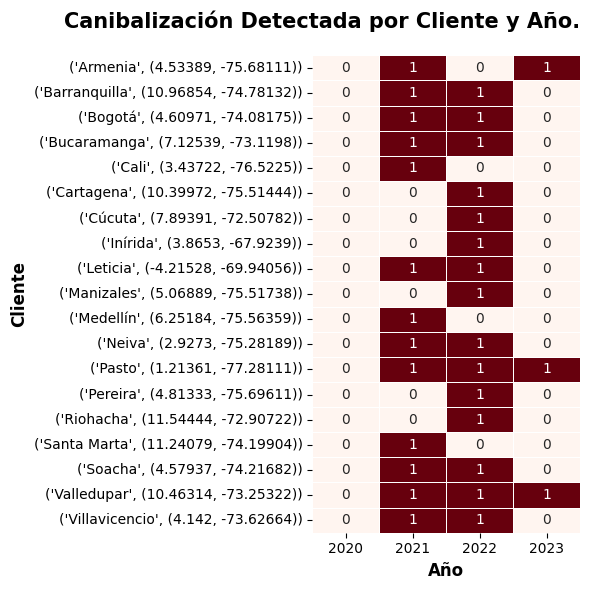

In [42]:
#Código para visualizar canibalización de cliente entre tiendas con heatmap.
# copia del resumen
df_heatmap = resumen.copy()

# convierte True/False a 1/0
df_heatmap['canibalizacion'] = df_heatmap['canibalizacion'].astype(int)

# crea el pivot table
pivot_cani = df_heatmap.pivot_table(
    index='cliente', columns='año', values='canibalizacion', fill_value=0, aggfunc='sum'
)

# convierte a int para que no queden floats
pivot_cani = pivot_cani.astype(int)

# dibuja el heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(
    pivot_cani,
    cmap='Reds',
    cbar=False,
    linewidths=0.5,
    annot=True, fmt='d'  # ya son ints
)

plt.title("Canibalización Detectada por Cliente y Año.",loc='right',fontsize=15,fontweight='bold',pad=20)
plt.ylabel("Cliente",fontsize=12,fontweight='bold')
plt.xlabel("Año",fontsize=12,fontweight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("grafico_canibalizacion_cliente_year.png", dpi=300, bbox_inches='tight')
plt.show()

In [43]:
"""
¿Qué significa la canibalización?
La canibalización ocurre cuando el aumento de ventas en una tienda se acompaña de una disminución de ventas en otra tienda sobre los mismos clientes.
En otras palabras, las tiendas están compitiendo entre sí por los mismos clientes, en lugar de crecer el mercado total.

En los resultados:
* Se observa clientes cuya participación en una tienda crece a costa de que disminuya en otra.
  El color rojo en el gráfico representa la cantidad de veces que un cliente fue detectado comprando en una tienda distinta a la habitual, lo que sugiere canibalización de ventas
  entre las propias tiendas.
* esta dinámica no incrementa las ventas globales: solo las redistribuye internamente.
"""
print()

In [44]:
"""
Se identificó que todas las tiendas cuentan con el mismo número de empleados en la fuerza de ventas.

Esto sugiere un enfoque estandarizado en la asignación de los recursos humanos, lo cual es interesante
ya que no se toma en consideración elementos importantes como la ubicación o características particulares en función de la demanda.

Dado que la dotación de personal es idéntica al menos en número; la gestión de los equipos comerciales no parece ajustarse a las necesidades específicas de cada punto de venta ni las particularidades de la demanda local.
Lo cual podría estarse asignando recursos de forma ineficiente.
"""
print()

In [45]:
"""
Recomendaciones para el dueño de las tiendas
 Identificar claramente las zonas y clientes que cada tienda debería atender y asignar responsabilidades exclusivas para reducir el solapamiento.

 Consolidar operaciones logísticas: si los mismos clientes son atendidos por varias tiendas, se podría atenderlos desde menos tiendas para optimizar costos y mejorar márgenes.

 Rediseñar la estrategia comercial para que las tiendas se especialicen en segmentos, zonas o categorías distintas, en lugar de competir entre sí.

 Establecer métricas de desempeño que midan el crecimiento del mercado total y no solo las ventas por tienda (para evitar incentivos perversos de canibalización).

"""
print()

###**🖱️ Inconsistencias en los Costos de envío por Tienda.**

In [46]:
#Código para costos de envío por cliente, tienda y producto.
# Paso 1: Preparar la base
base = base_tienda_concatenar[['Producto', 'Costo de envío', 'Lugar de Compra', 'cliente', 'Tienda', 'Año','Vendedor','Mes','Fecha de Compra']].copy()

# Paso 2: Crear tupla (Lugar de Compra, cliente)
base['Cliente'] = list(zip(base['Lugar de Compra'], base['cliente']))

# Paso 3: Eliminar columnas que ya están unidas en 'Cliente'
base.drop(columns=['Lugar de Compra', 'cliente'], inplace=True)

# Paso 4: Agrupar por Cliente, Tienda y Año
resumen = base.groupby(['Cliente', 'Tienda', 'Año','Producto','Mes','Costo de envío','Fecha de Compra']).agg(
    Registros=('Costo de envío', 'count'),                    # cantidad de registros

).reset_index()


# Mostrar resumen cliente ('Bogotá', (4.60971, -74.08175))) año 2020.
resumen_bogota_tv_2020 = resumen[(resumen['Cliente'] == ('Bogotá', (4.60971, -74.08175))) &
                              (resumen['Año'] == 2020) &
                              (resumen['Producto'] == 'TV LED UHD 4K')&
                              (resumen)['Mes'].isin([1, 2, 3]) ]
resumen_bogota_iphone_2020 = resumen[(resumen['Cliente'] == ('Bogotá', (4.60971, -74.08175))) &
                              (resumen['Año'] == 2020) &
                              (resumen['Producto'] == 'Iphone 15')&
                              (resumen)['Mes'].isin([1, 2, 3]) ]
resumen_bogota_refri_2020 = resumen[(resumen['Cliente'] == ('Bogotá', (4.60971, -74.08175))) &
                              (resumen['Año'] == 2020) &
                              (resumen['Producto'] == 'Refrigerador')&
                              (resumen)['Mes'].isin([1, 2, 3]) ]

#Refrigerador

resumen_bogota_tv_2020.sort_values(by='Mes', ascending=False)
print(f"💸🚚🚨📦 Costo de envío cliente Bogotá para el producto TV LED UHD 4K primer Trimestre año 2020.\n")
display(resumen_bogota_tv_2020)
print(f"\n\n💸🚚🚨📦 Costo de envío cliente Bogotá para el producto Iphone 15 primer Trimestre año 2020.\n")
display(resumen_bogota_iphone_2020)
print(f"\n\n💸🚚🚨📦 Costo de envío cliente Bogotá para el producto Refrigerador primer Trimestre año 2020.\n")
display(resumen_bogota_refri_2020)

💸🚚🚨📦 Costo de envío cliente Bogotá para el producto TV LED UHD 4K primer Trimestre año 2020.



,Cliente,Tienda,Año,Producto,Mes,Costo de envío,Fecha de Compra,Registros
618,"(Bogotá, (4.60971, -74.08175))",Tienda 1,2020,TV LED UHD 4K,1,111400.0,2020-01-07,1
619,"(Bogotá, (4.60971, -74.08175))",Tienda 1,2020,TV LED UHD 4K,2,151200.0,2020-02-05,1
1595,"(Bogotá, (4.60971, -74.08175))",Tienda 2,2020,TV LED UHD 4K,1,93800.0,2020-01-31,1
1596,"(Bogotá, (4.60971, -74.08175))",Tienda 2,2020,TV LED UHD 4K,1,115400.0,2020-01-15,1
1597,"(Bogotá, (4.60971, -74.08175))",Tienda 2,2020,TV LED UHD 4K,1,142300.0,2020-01-17,1
2583,"(Bogotá, (4.60971, -74.08175))",Tienda 3,2020,TV LED UHD 4K,2,137300.0,2020-02-11,1
3589,"(Bogotá, (4.60971, -74.08175))",Tienda 4,2020,TV LED UHD 4K,2,113400.0,2020-02-15,1




💸🚚🚨📦 Costo de envío cliente Bogotá para el producto Iphone 15 primer Trimestre año 2020.



,Cliente,Tienda,Año,Producto,Mes,Costo de envío,Fecha de Compra,Registros
485,"(Bogotá, (4.60971, -74.08175))",Tienda 1,2020,Iphone 15,1,82900.0,2020-01-24,1
1464,"(Bogotá, (4.60971, -74.08175))",Tienda 2,2020,Iphone 15,3,118300.0,2020-03-09,1
2439,"(Bogotá, (4.60971, -74.08175))",Tienda 3,2020,Iphone 15,2,116300.0,2020-02-06,1




💸🚚🚨📦 Costo de envío cliente Bogotá para el producto Refrigerador primer Trimestre año 2020.



,Cliente,Tienda,Año,Producto,Mes,Costo de envío,Fecha de Compra,Registros
554,"(Bogotá, (4.60971, -74.08175))",Tienda 1,2020,Refrigerador,2,114500.0,2020-02-09,1
555,"(Bogotá, (4.60971, -74.08175))",Tienda 1,2020,Refrigerador,3,129100.0,2020-03-05,1
1547,"(Bogotá, (4.60971, -74.08175))",Tienda 2,2020,Refrigerador,3,129400.0,2020-03-18,1
2519,"(Bogotá, (4.60971, -74.08175))",Tienda 3,2020,Refrigerador,3,78800.0,2020-03-28,1
2520,"(Bogotá, (4.60971, -74.08175))",Tienda 3,2020,Refrigerador,3,123800.0,2020-03-29,1


In [47]:
"""
Ejemplo de ineficiencia en los costos de envío por tienda y producto.
Tomamos como muestra las compras del cliente en Bogotá para el primer trimestre de 2020 los productos best salers   'TV LED UHD 4K' y Iphone 15.
para un mismo producto el cliente ha pagado 7 diferentes cobros por envío para  'TV LED UHD 4K' y 3 para Iphone 15.
Llama mucho la atención que por ejemplo que la vendedora Camila Rivera atiende 3 veces al mismo cliente y asigna 3 valores de costo de envío desde 3 tiendas diferenctes.
Hay una clara evidencia de ineficiencia en los costos de envío que debe mejorarse, antes que los clientes se den cuenta.
Observamos que por ejemplo T1, T2 y T3 asignan al producto Iphon 15 costos de envío similar a un refrigerador aun mismo cliente y destino, Es algo que se debe mejorar rápido.
Hay una clara asignación de costos sin estrategia.
El cliente bogotá es el que más facturación en ventas genera, se debe tener cuidado para fideliarlos y no perderlos.
Hay que recordar el riesgo de concentración y la vulnerabilidad estratégica del negocio en conjunto.
"""
print()


###**🖱️ Analisis Preliminar de Correlación de Variables.**

In [48]:
#Análisis de correlación de variable calificación con producto,vendedor,metodo de pago.
df_corr = base_tienda_concatenar.copy()

# Codificamos todas las variables categóricas relevantes
df_corr = pd.get_dummies(df_corr, columns=['Producto', 'Vendedor', 'Método de pago'], drop_first=True)

# Definimos las variables que nos interesan
variables_de_interes = [col for col in df_corr.columns if (
    'Producto_' in col or
    'Vendedor_' in col or
    'Método de pago_' in col
)]
variables_de_interes += ['Calificación', 'Costo de envío']

# Filtrar y calcular la matriz de correlación
df_correlacion = df_corr[variables_de_interes]
matriz_correlacion = df_correlacion.corr()

# Ver correlaciones con la calificación
correlaciones_con_calificacion = matriz_correlacion['Calificación'].sort_values(ascending=False)
#visualización para Análisis de correlación de variable calificación con producto,vendedor,metodo de pago.
print(f"🚨🔍 Análisis de Correlación de Variable Calificación con Producto, Vendedor, Método de Pago.\n")
display(correlaciones_con_calificacion.head(70))


🚨🔍 Análisis de Correlación de Variable Calificación con Producto, Vendedor, Método de Pago.



,Calificación
Calificación,1.000000
Vendedor_Ángel Rodriguez,0.024125
Método de pago_Nequi,0.023648
Producto_Impresora,0.023057
Producto_Juego de mesa,0.020033
...,...
Producto_Set de vasos,-0.015778
Producto_Modelado predictivo,-0.016354
Vendedor_Juliana Costa,-0.019148
Método de pago_Tarjeta de crédito,-0.019799


In [49]:
#Análisis de correlación de variable calificación/Costo de envío con 'Tienda', 'cliente', 'Cantidad de cuotas'.
df_corr = base_tienda_concatenar.copy()

# Codificamos todas las variables categóricas relevantes
df_corr = pd.get_dummies(df_corr, columns=['Tienda', 'cliente', 'Cantidad de cuotas'], drop_first=True)

# Definimos las variables que nos interesan
variables_de_interes = [col for col in df_corr.columns if (
    'Tienda_' in col or
    'cliente_' in col or
    'Cantidad de cuotas_' in col
)]
variables_de_interes += ['Calificación', 'Costo de envío']

# Filtrar y calcular la matriz de correlación
df_correlacion = df_corr[variables_de_interes]
matriz_correlacion = df_correlacion.corr()

# Ver correlaciones con la calificación
correlaciones_con_calificacion = matriz_correlacion['Calificación'].sort_values(ascending=False)
print(f"🚨🔍 Análisis de Correlación de Variable Calificación/Costo de Envío con 'Tienda', 'cliente', 'Cantidad de cuotas'.\n")
display(correlaciones_con_calificacion.head(70))

🚨🔍 Análisis de Correlación de Variable Calificación/Costo de Envío con 'Tienda', 'cliente', 'Cantidad de cuotas'.



,Calificación
Calificación,1.000000
"cliente_(4.60971, -74.08175)",0.060390
Cantidad de cuotas_14,0.014596
Tienda_Tienda 3,0.014038
Cantidad de cuotas_2,0.010795
Cantidad de cuotas_9,0.010213
"cliente_(1.21361, -77.28111)",0.009698
Tienda_Tienda 2,0.009461
Cantidad de cuotas_12,0.008978
"cliente_(3.43722, -76.5225)",0.007993


In [50]:
"""
¿Cómo interpretar ese rango tan bajo?
Coeficientes cercanos a 0 (como −0.03, 0.001) indican:
Ausencia de relación lineal: No hay evidencia de que cuando una variable sube, la otra también lo haga (o baje) consistentemente.

Variables independientes en términos lineales: Cambiar de producto, vendedor o método de pago no parece afectar directamente la calificación del cliente.

Posiblemente hay otros factores que sí influyen en la calificación, pero no están en tu modelo (por ejemplo, tiempo de entrega, calidad percibida, errores en el pedido, etc.).
"""
print()

###**🖱️ Mapa de Geolocalización por Cliente con resumen de ventas por Tienda.**

In [51]:
#Código para geolocalizar cliente con resumen de ventas por tienda y año.
# Crear mapa centrado en Bogotá
mapa = folium.Map(location=[4.60971, -74.08175], zoom_start=12)

# Función para determinar emoji de tendencia (usando 2020 a 2022)
def emoji_variacion(valores):
    dif = valores[-1] - valores[0]  # 2022 - 2020
    if dif > 0:
        return '📈'
    elif dif < 0:
        return '📉'
    else:
        return '➖'

# Clientes únicos
clientes = df_resumen['cliente'].unique()

for cliente in clientes:
    ciudad, coords = cliente
    lat, lon = coords

    # Filtrar todas las tiendas del cliente
    df_cliente = df_resumen[df_resumen['cliente'] == cliente]

    popup_text = (
        f"<b>🛒 Ventas por tienda y año.</b><br><br>"
        f"<b>👥 Cliente:</b> {ciudad}.<br><br>"
    )

    total_facturacion = 0

    #Por tienda: facturación + participación
    for _, row in df_cliente.iterrows():
        tienda = row['tienda']
        facturacion = row['facturación_total']
        participacion = row['participacion_acumulado']
        total_facturacion += facturacion

        popup_text += f"<b>🏪 {tienda}:</b> ${facturacion:,.2f} ({participacion:.2f}%)<br>"

    #Ventas anuales totales (2020–2023)
    ventas_totales = df_cliente[['2020', '2021', '2022', '2023']].sum()
    ventas_str = {año: "${:,.0f}".format(ventas_totales[año]) for año in ['2020', '2021', '2022', '2023']}
    año_top = ventas_totales.idxmax()
    tendencia_visible = emoji_variacion(ventas_totales[['2020', '2022']].values)

    popup_text += (
        f"<br><b>📆 Año 2020:</b> {ventas_str['2020']}<br>"
        f"<b>📆 Año 2021:</b> {ventas_str['2021']}<br>"
        f"<b>📆 Año 2022:</b> {ventas_str['2022']}<br>"
        f"<b>📆 Año 2023:</b> {ventas_str['2023']}<br>"
        f"<b>🔝 Mayor venta:</b> <u>{año_top}.</u><br><br>"
    )

    #Total facturado + tendencia general
    popup_text += (
        f"<b>💵 Total facturado:</b> ${total_facturacion:,.2f}<br>"
        f"<b>📈 Tendencia general (2020–2022):</b> {tendencia_visible}"
    )

    # Color del marcador según tendencia (sin usar 2023)
    color_icono = 'red' if tendencia_visible == '📉' else 'green' if tendencia_visible == '📈' else 'blue'

    # Agregar al mapa
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=ciudad,
        icon=folium.Icon(color=color_icono)
    ).add_to(mapa)

mapa.save("mapa_geolocalizacion_clientes.html")

# Mostrar mapa
mapa


---

#👨🏻‍💻 📄 Informe de Análisis de Rendimento para AluraStore LATAM 2020-2023.

---

![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/Imagen_distintiva_alurastore.png)

---

###1️⃣ Propósito.
---

El presente informe tiene como finalidad proporcionar al Sr. Juan, propietario de la cadena Alura Store, una base analítica sólida para apoyar su decisión respecto a la posible venta de una de sus cuatro tiendas. Para ello, se llevó a cabo una evaluación integral que considera variables clave como el rendimiento en ventas, la composición del portafolio de productos, la experiencia del cliente y la eficiencia operativa.

A través del análisis, se identificaron patrones de comportamiento y solapamiento entre tiendas, riesgos de concentración y oportunidades de mejora compartidas que inciden directamente en la competitividad y sostenibilidad del negocio en su conjunto. Estos hallazgos buscan orientar al Sr. Juan a adoptar una visión más estratégica de sus negocios actuales antes de explorar nuevos horizontes de inversión, y a complementar los hallazgos preliminares contenidos en este informe con información basada en datos de aquellas tiendas a las que no se tuvo acceso al momento de su elaboración.

------

###2️⃣ Metodología.
---


Para el desarrollo del análisis se realizaron los siguientes cálulos usando
los datos históricos disponibles en ventas, categorías de productos, formas de pago, cobertura geográfica, personal de ventas y calificaciones otorgadas por los clientes en el siguiente orden:

- **Cálculos Solicitados**. Métricas principales requeridas por la consigna: ventas totales por tienda, ventas por categoría y tienda, productos más y menos vendidos, valoración media por tienda y costos promedio de envío.

- **Cálculos Complementarios**. Análisis derivados para profundizar la comprensión de los cálculos solicitados. Incluyen: ventas anuales por tienda, número de categorías por tienda, categorías comunes entre tiendas, contribución por categoría en las ventas totales y su acumulado, número de categorías que concentran el 80 % de las ventas totales, número total de productos por categoría y tienda, productos únicos y comunes entre tiendas, catálogo de productos por tienda, participación de los productos más vendidos en el total de ventas por categoría, facturación media por producto y tienda, y notas mínimas y máximas por tienda.

- **Cálculos Exploratorios**. Evaluaciones adicionales para comprender el contexto operativo, comercial y geográfico de las tiendas con mayor profundidad:
Cantidad de formas de pago únicas por tienda, Opciones de pago comunes entre tiendas,Número de vendedores por tienda,Empleados de ventas comunes entre tiendas, Número de zonas de cobertura por tienda, Zonas de cobertura comunes entre tiendas, Número de coordenadas geográficas únicas por tienda, Comparación de coordenadas GPS de clientes por tienda, Check list comparativo de coordenadas GPS por tienda, Compras totales por cliente y tienda, Compras anuales, participación anual y acumulada del cliente (Bogotá, (4.60971, -74.08175)) en las ventas totales por tienda, Resumen de solapamientos, variaciones y canibalización,Costos de envío por cliente, tienda y producto,Análisis de correlación de la variable calificación con producto, vendedor y método de pago.
Análisis de correlación de las variables calificación y costo de envío con 'tienda', 'cliente' y 'cantidad de cuotas'.

- **Gráficos y otros visualizaciones de resumen.** Imagenes que permitieron interpretar tendencias, riesgos y redundancias en el modelo actual.

---


###3️⃣ **Hallazgos.**

---

####**🕵 En Cálculos Solicitados.**

 🔍 **Ventas Totales por Tienda.**

Las ventas totales de las cuatro tiendas resultaron muy similares. La diferencia entre la tienda con mayor facturación (T1) y la de menor (T4) representa solo el **2,55 % de las ventas globales**, lo que **no permite identificar un liderazgo claro**.


  🔍 **Ventas por Categoría y Tienda.**
Todas las tiendas manejan exactamente las mismas **8 categorías**, y comparten un **orden de prioridad comercial idéntico**. El 80 % de las ventas se concentra en **Electrónicos, Electrodomésticos y Muebles**, lo que indica **alto riesgo de concentración**.

  🔍 **Productos Más y Menos Vendidos por Tienda.**
El catálogo es idéntico en todas las tiendas. Los productos con mayor rotación son los mismos (TV LED UHD 4K, iPhone 15, Refrigerador), pero su volumen varía ligeramente. La Tienda 4 depende exclusivamente de productos de categoría Electrónicos, mientras que las Tiendas 1,2 y 3 de Electrónicos y Electrodomésticos. Lo cual confirma concentración a nivel de producto también. Productos como juguetes son los de menos ventas en las cuatro tiendas.

 🔍 **Valoración Media por Tienda.**
Las calificaciones promedio están en rangos aceptables (3.9 - 4.4). Sin embargo, **todas las tiendas reciben tanto notas altas como bajas**, lo que sugiere experiencias de cliente heterogéneas. Se debe indagar accediendo a comentarios de los clientes.

 🔍 **Costo Promedio de Envío por Tienda.**
Se detectaron **graves inconsistencias en el cobro de envíos**: para el mismo producto, destino y cliente, se cobraron distintos valores en distintas tiendas. Esto evidencia **falta de estrategia logística**.

---

####**🕵 En Cálculos Complementarios.**

 🔍 **Ventas Anuales por Tienda**: T2 presenta crecimiento sostenido desde 2020. T1 y T4 muestran caídas.

 🔍 **Participación por Categoría y Producto**: Altísima concentración: 50 % o más de ventas de categoría se generan por 2 productos.

 🔍 **Catálogo de Productos**: Homogéneo en todas las tiendas.

 🔍 **Productos Únicos y Comunes**: No existen productos exclusivos por tienda.

 🔍 **Número de Categorías que concentran el 80 % del Mix**: Solo 3 de 8 en todas las tiendas.

 🔍 **Facturación Media por Producto**: Aun con mismo catálogo, rentabilidad puede variar por ubicación o contexto.

 🔍 **Notas Mínimas y Máximas**: Todas las tiendas reciben tanto notas 1 como 5.

---

####**🕵 En Cálculos Exploratorios.**

 🔍 **Zonas de Cobertura y Coordenadas**: Todas las tiendas atienden las mismas 19 ciudades con **coordenadas GPS idénticas**.

 🔍 **Clientes Comunes**: Un mismo cliente genera compras en las 4 tiendas. En promedio, **el cliente de Bogotá representa el 40,95 % de las ventas globales**.

 🔍 **Solapamiento**: Clientes compran en varias tiendas. No hay segmentación geográfica ni exclusividad.

 🔍 **Canibalización**: El crecimiento de una tienda se acompaña de caída en otra, sobre los mismos clientes. No hay aumento real de ventas.

 🔍 **Fuerza de Ventas**: Empleados idénticos en todas las tiendas. Sin ajuste a la demanda local.

 🔍 **Métodos de Pago**: Idénticos entre tiendas.

 🔍 **Correlación de Calificación con variables**: No hay relación clara con vendedor, método de pago o producto. Falta de variables relevantes.

 ---

###4️⃣**Conclusiones.**

---

#### 🛒**Demanda.**
El cliente objetivo es altamente concentrado y homogéneo.
No hay diferenciación por zonas ni comportamiento.
Alta vulnerabilidad: si un cliente se va, se pierde el negocio.

####📦**Oferta.**

- Catálogo idéntico en todas las tiendas.

- Mix de productos y categorías excesivamente concentrado.

- No hay especialización ni estrategia diferenciada.


####🏷️ **Gestión Comercial.**
- Las tiendas compiten entre sí, canibalizando ventas.
- No se mide ni fomenta el crecimiento del mercado, solo ventas por tienda.
- No hay mecanismos de fidelización ni feedback cualitativo.

#### ⚙️ **Gestión Operativa.**

- Empleados rotan entre tiendas sin criterio geográfico.
- Costos de envío incoherentes.
- Falta de segmentación logística y eficiencia en distribución.

---

###5️⃣**Recomendación Final.**

---

Dado que las tiendas comparten clientes, catálogo, empleados y cobertura, **no es posible recomendar la venta de una tienda en específico** sin antes hacer profundas correcciones estratégicas.

Se recomienda al Sr. Juan:

- **Definir zonas exclusivas** para cada tienda y segmentar clientes por ubicación.
- **Especializar la oferta** por tienda (productos o categorías).
- **Optimizar la logística** y unificar criterios de costos de envío.
- **Medir el crecimiento real** del mercado, no solo ventas aisladas.
- **Implementar feedback del cliente** para identificar causas de satisfacción o insatisfacción.

**Solo después de implementar estas correcciones**, se podrá evaluar cuál tienda tiene menor potencial estratégico para ser vendida sin debilitar el negocio en su conjunto.

---

### 6️⃣ Gráficos de Apoyo.

---

A continuación, se presentan los gráficos clave que complementan y refuerzan los hallazgos descritos en el informe:


####**Gráfico 1 – Ventas Totales por Tienda.**
Representa el total de ventas por tienda en pesos colombianos (COP $).  
Muestra que las ventas globales de las cuatro tiendas son **muy similares**, lo cual limita la identificación de una tienda con rendimiento claramente superior.

---

![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/grafico_ventas_totales%20(1).png)

---


####**Gráfico 2 – Ventas Anuales por Tienda.**
Desempeño de cada tienda a lo largo de los años.  
Se evidencia un **crecimiento sostenido de la Tienda 2** desde 2020, mientras que **Tienda 1, 3 y 4 muestran caídas**, algunas abruptas.

---

![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/grafico_ventas_anuales_tienda%20(1).png)

---

####**Gráfico 3 – Contribución por Categoría en las Ventas Totales.**
Permite visualizar la participación de cada categoría en las ventas totales.  
Evidencia que solo **3 de las 8 categorías** concentran el **80 % de las ventas en todas las tiendas**, reflejando un **alto riesgo de concentración** y baja diversificación del portafolio.

---


![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/grafico_contribucion_categorias_tienda.png)

---

####**Gráfico 4 – Compras y Participación Anual por Tienda y Cliente.**
Muestra la participación del cliente ubicado en Bogotá (4.60971, -74.08175) en las ventas de cada tienda a lo largo de cuatro años.  
Refleja la **altísima dependencia** de este cliente individual, el **solapamiento entre tiendas** y la **vulnerabilidad estratégica del modelo de negocio**.

---


![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/grafico_compra_participacion_anual_tienda.png)

---

####**Gráfico 5 – Canibalización Detectada por Cliente y Año.**
Visualiza cuántas veces un cliente compró en una tienda distinta a la habitual.  
Esta redistribución interna de ventas **no genera crecimiento neto**, sino **competencia entre tiendas de la misma cadena**, es decir, **canibalización**.

---


![](https://raw.githubusercontent.com/EuniceGarcia503/Challenge1_AluraStore/refs/heads/main/Imagenes_AluraStore/grafico_canibalizacion_cliente_year.png)

---

####**Gráfico 6 – Mapa de Geolocalización de Cliente con Resumen de Ventas.**
Representación geográfica de los clientes y su distribución de compras.  
Muestra que las tiendas comparten la misma red de 19 clientes, compitiendo por ellos sin diferenciación territorial.  
Evidencia **una política de distribución deficiente**, sin segmentación geográfica, lo que debilita la estrategia comercial y limita el crecimiento.

---

🗺️ [Haz clic aquí para ver el mapa de geolocalización de clientes](https://eunicegarcia503.github.io/Challenge1_AluraStore/Imagenes_AluraStore/mapa_geolocalizacion_clientes.html
)

O ejecuta la celda de código correspondiente para visualizarlo directamente dentro del informe.

---